In [1]:
import os
os.chdir("/home/studio-lab-user/sagemaker-studiolab-notebooks/AI-OT24/Reinforcement-Learning-Stock-Porfolio-Managment")
!pip install -q -r requirements.txt
import sys
sys.path.append('./utils')
from trading_functions import *
# Core Libraries
import os
import sys
import time
import datetime
import warnings
import itertools
#warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = info, 2 = warnings, 3 = errors

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Financial Data
import yfinance as yf
import quantstats as qs
import ta

# Machine Learning - Supervised Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Machine Learning - Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy

# Reinforcement Learning and Environments
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import (
    EvalCallback, StopTrainingOnRewardThreshold, StopTrainingOnNoModelImprovement
)
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecCheckNan, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import ARS, MaskablePPO, RecurrentPPO, QRDQN, TRPO

# Imitation Learning
from imitation.algorithms import bc
from imitation.testing.reward_improvement import is_significant_reward_improvement
from imitation.data.types import Transitions

# Interactive Brokers API
from ib_insync import *

from typing import Callable

from collections import Counter

clear_output()


Evaluating model: ('A2C', 0)


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


A2C Train Mean reward: 95.50 ± 0.00
A2C
Total return of portfolio: 248.76%


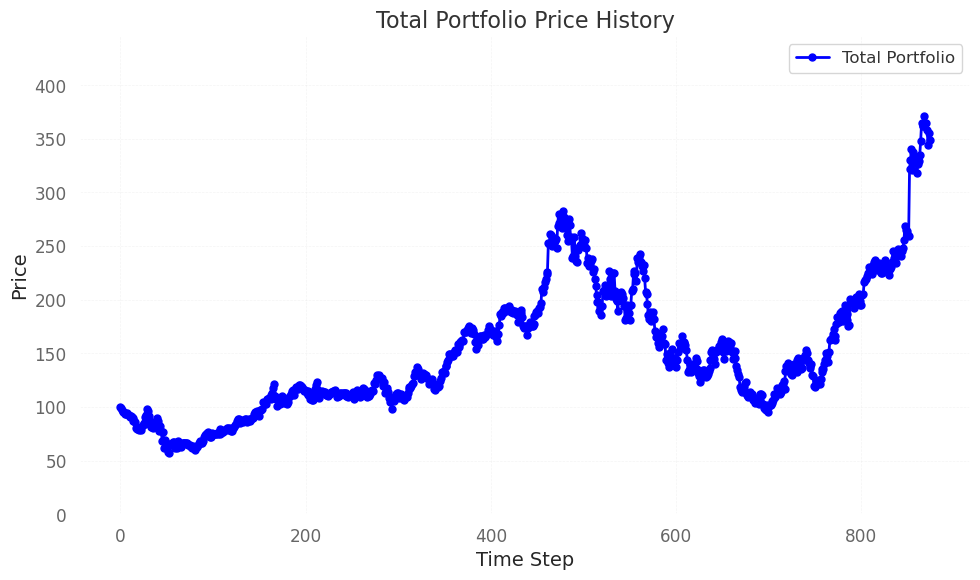

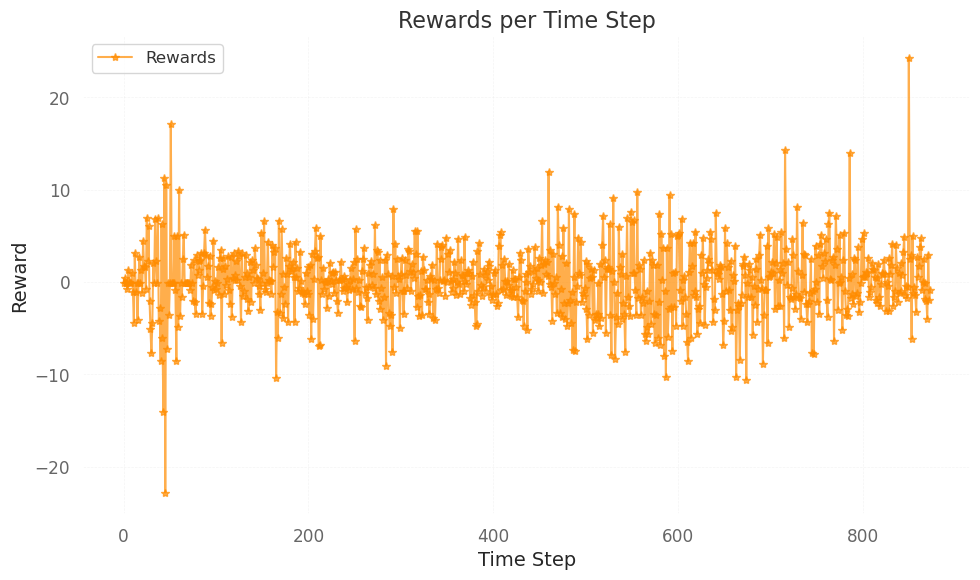

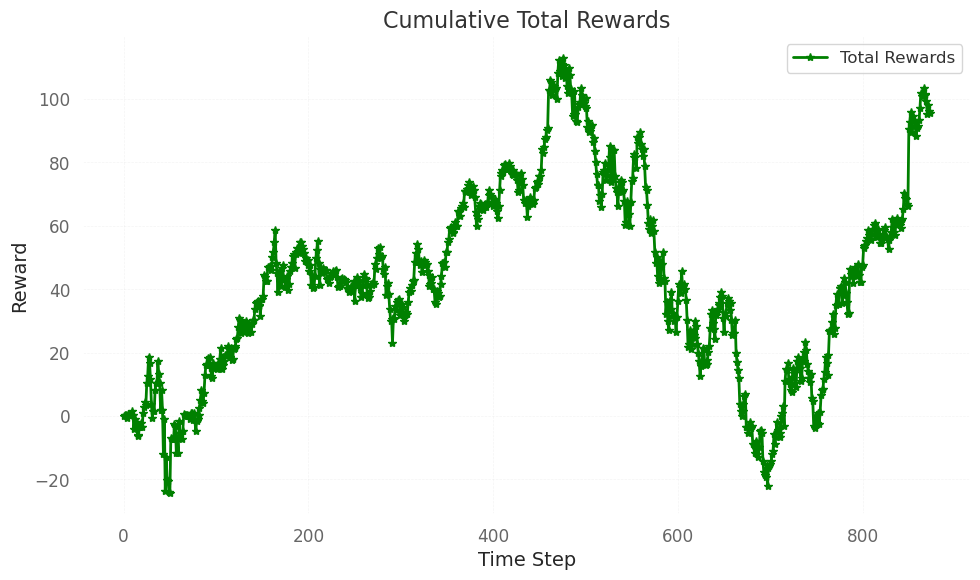

Total rewards: 95.49522463206726
Evaluating model: ('A2C', 1)
A2C Train Mean reward: 67.69 ± 0.00
A2C
Total return of portfolio: 45.79%


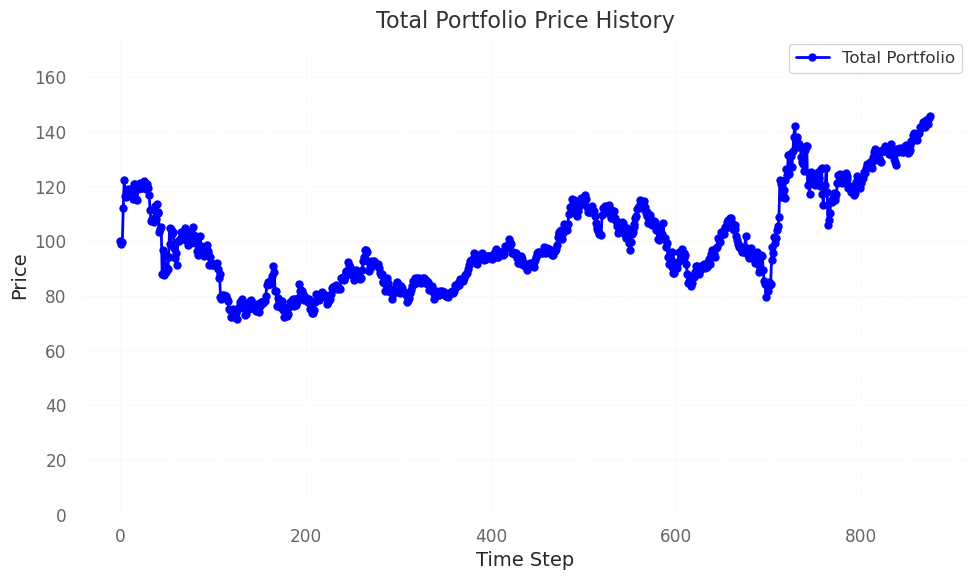

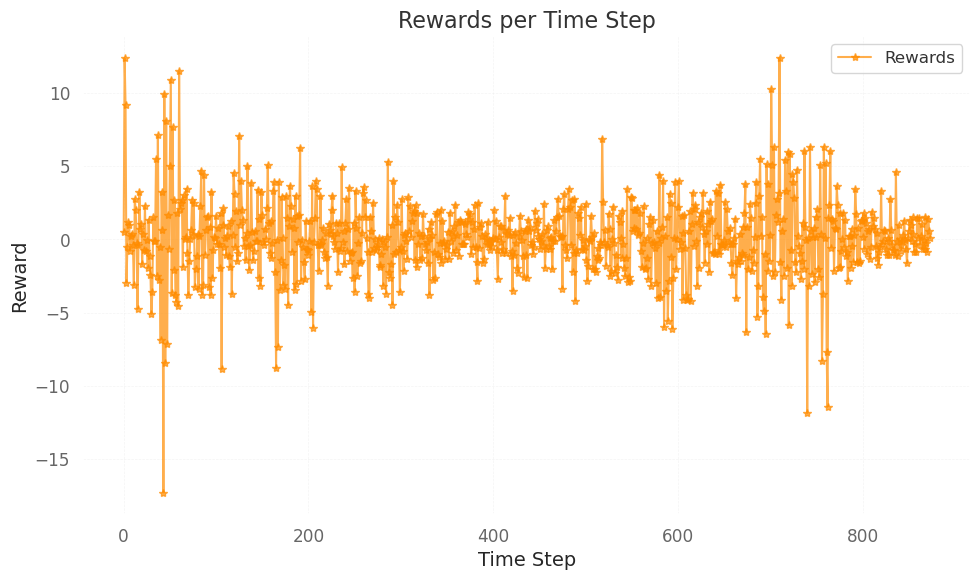

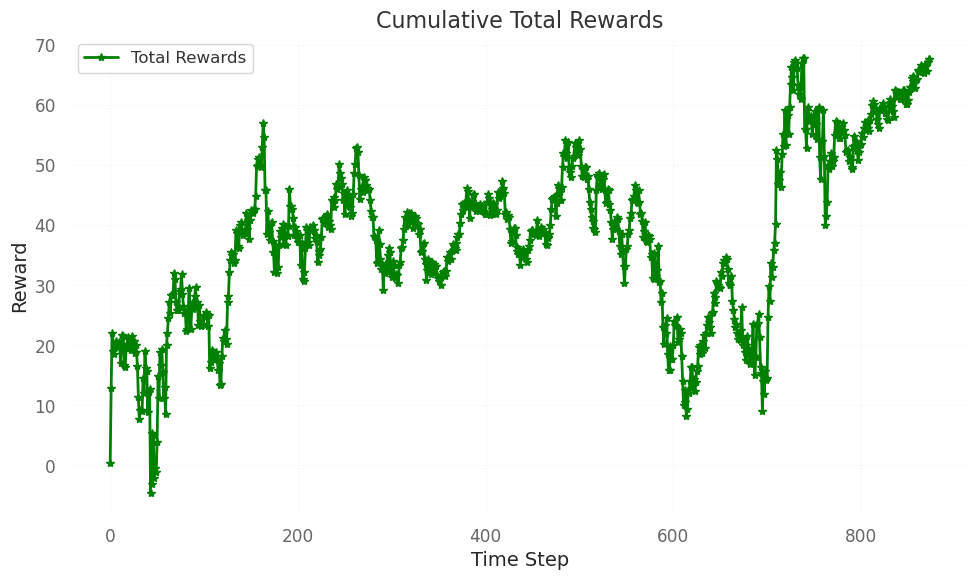

Total rewards: 67.69140276514987
Evaluating model: ('A2C', 2)
A2C Train Mean reward: -116.60 ± 0.00
A2C
Total return of portfolio: -79.43%


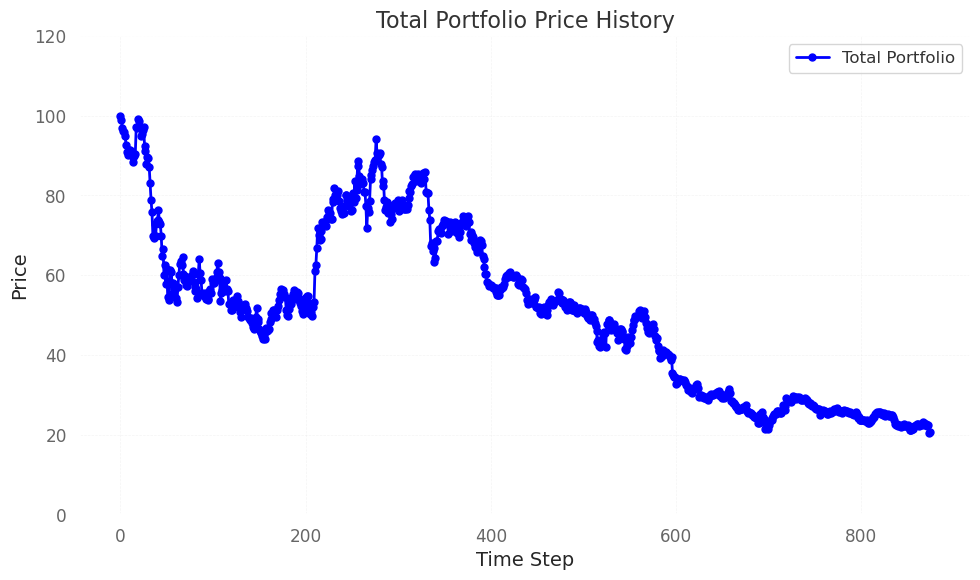

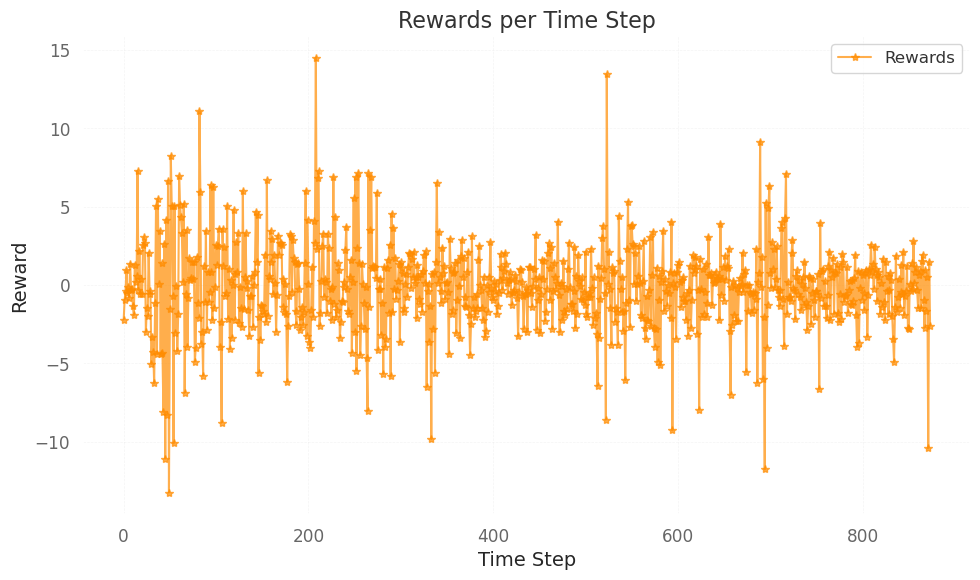

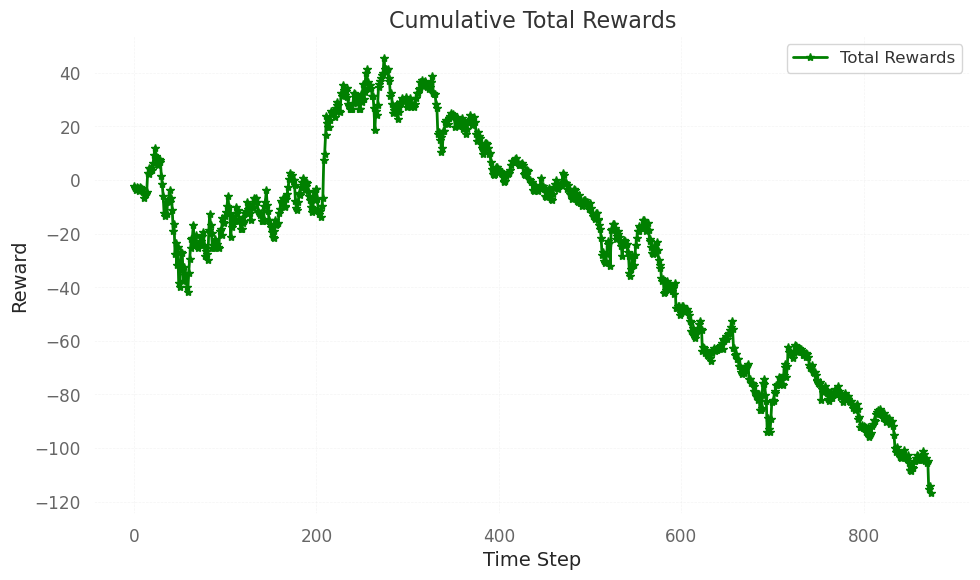

Total rewards: -116.60433156780748
Evaluating model: ('A2C', 3)
A2C Train Mean reward: -75.24 ± 0.00
A2C
Total return of portfolio: -57.04%


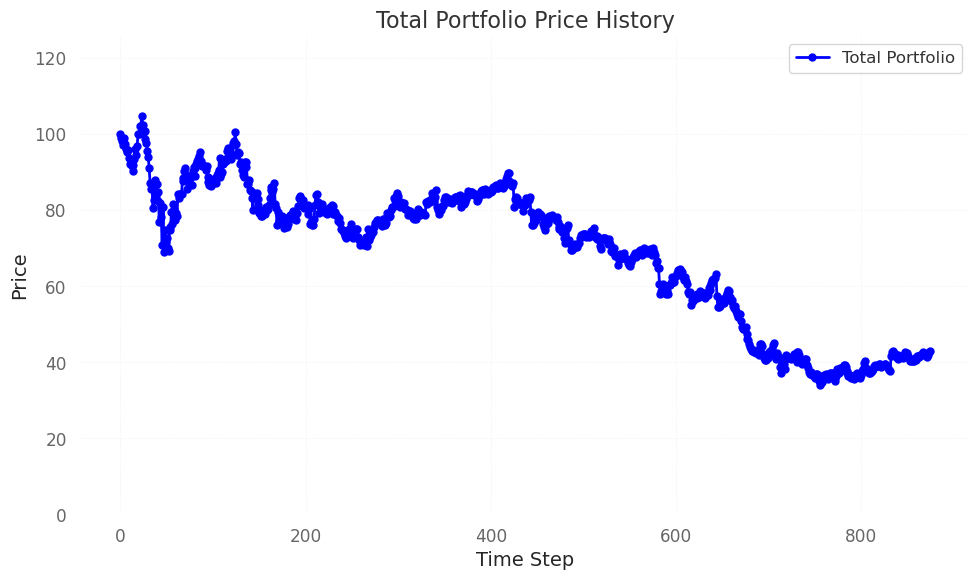

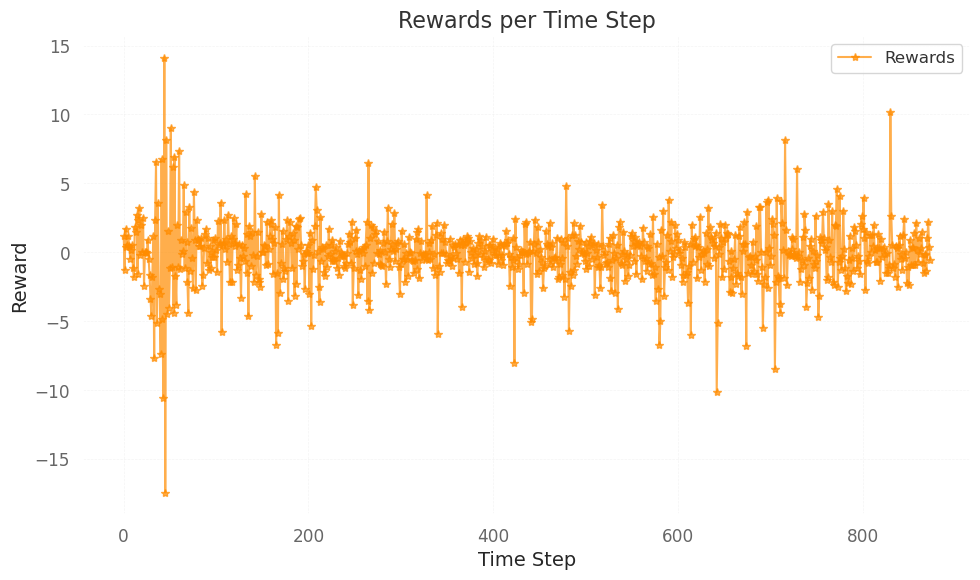

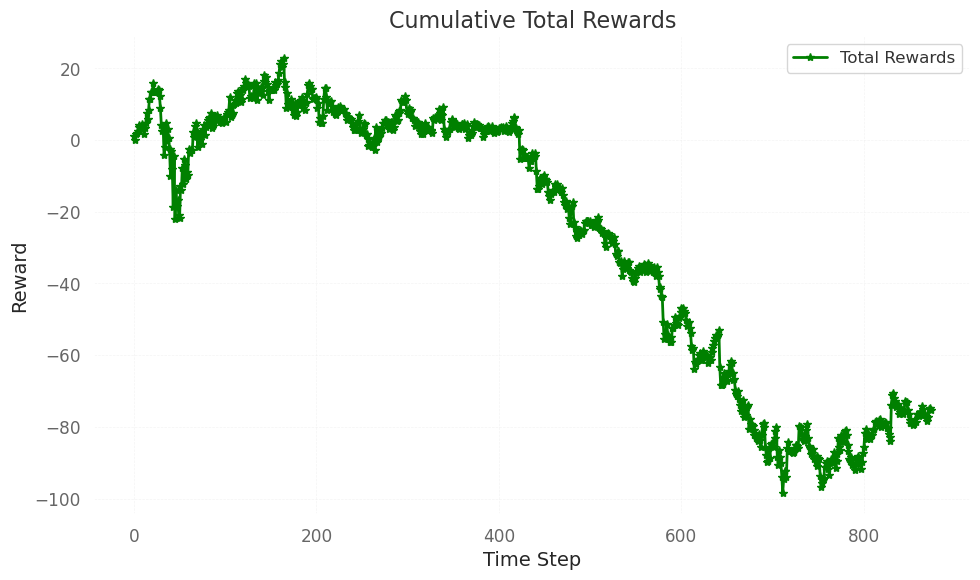

Total rewards: -75.24232497110897
Evaluating model: ('A2C', 4)
A2C Train Mean reward: -43.24 ± 0.00
A2C
Total return of portfolio: -66.96%


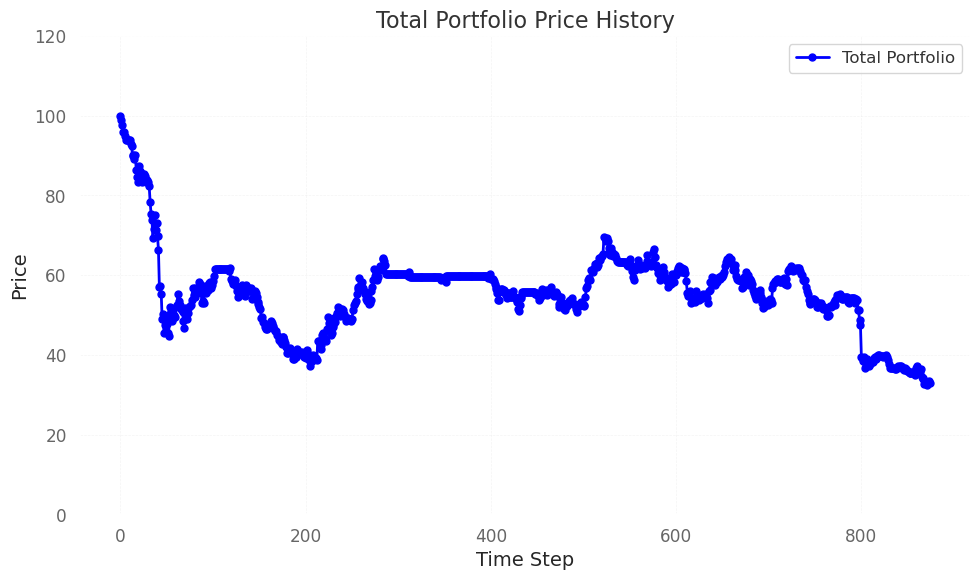

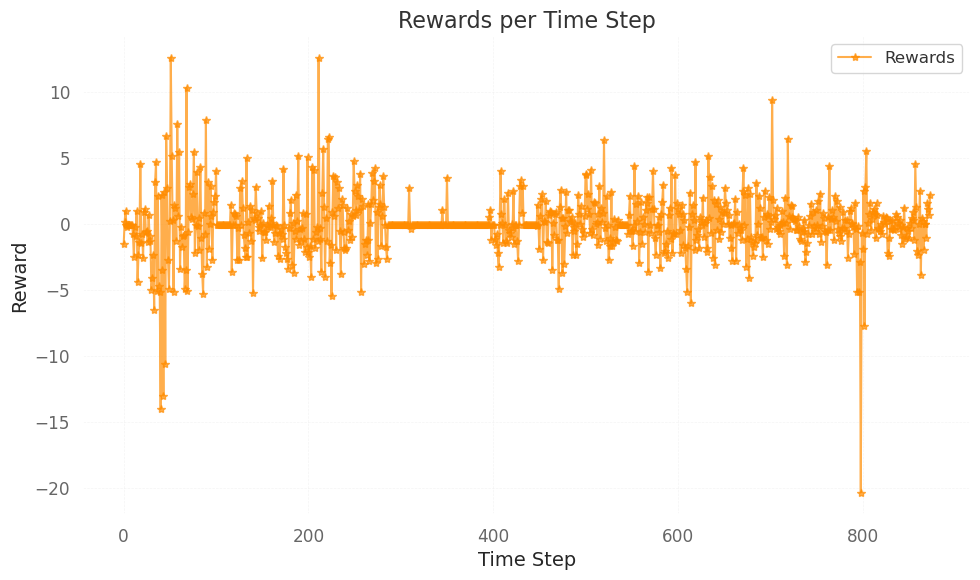

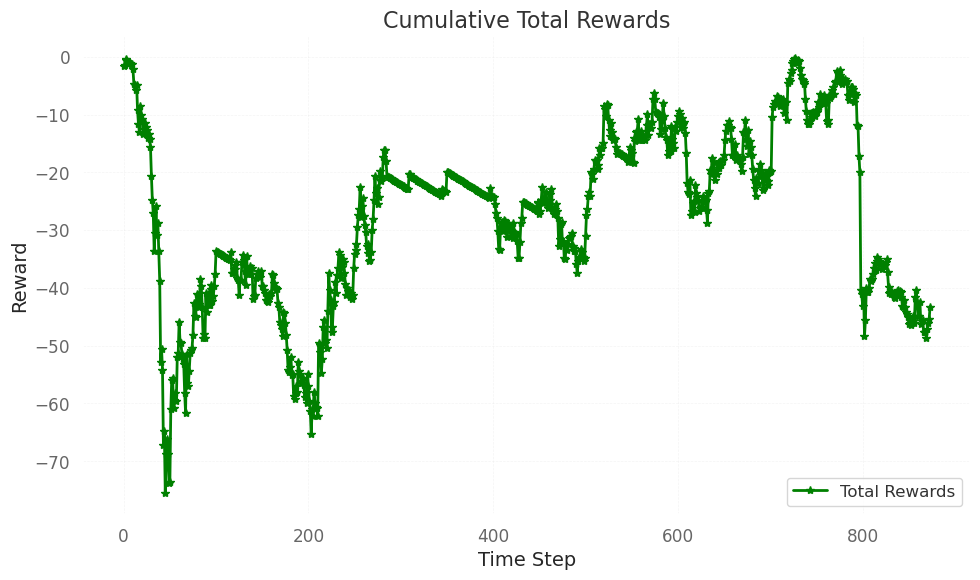

Total rewards: -43.23769181254654
Evaluating model: ('A2C', 5)
A2C Train Mean reward: -137.10 ± 0.00
A2C
Total return of portfolio: -79.08%


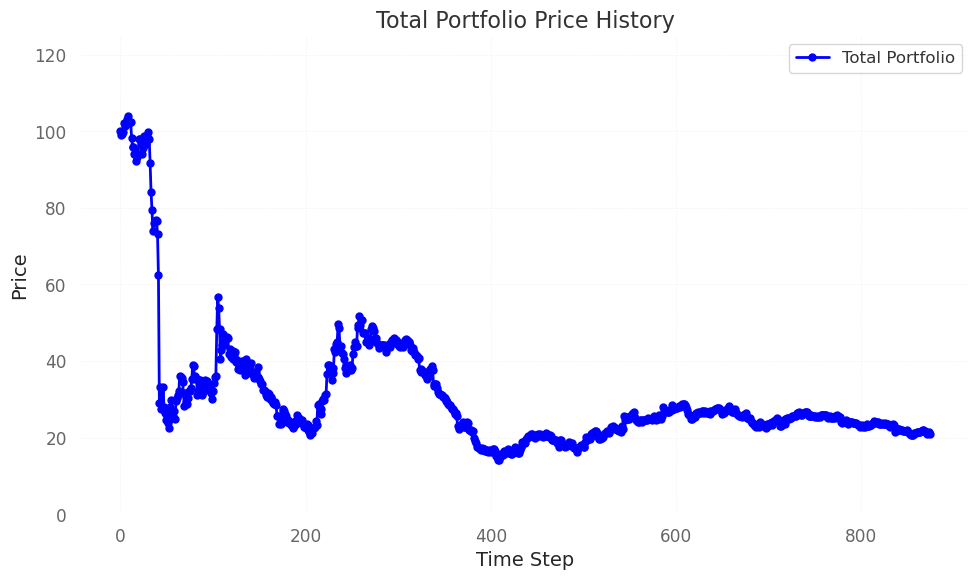

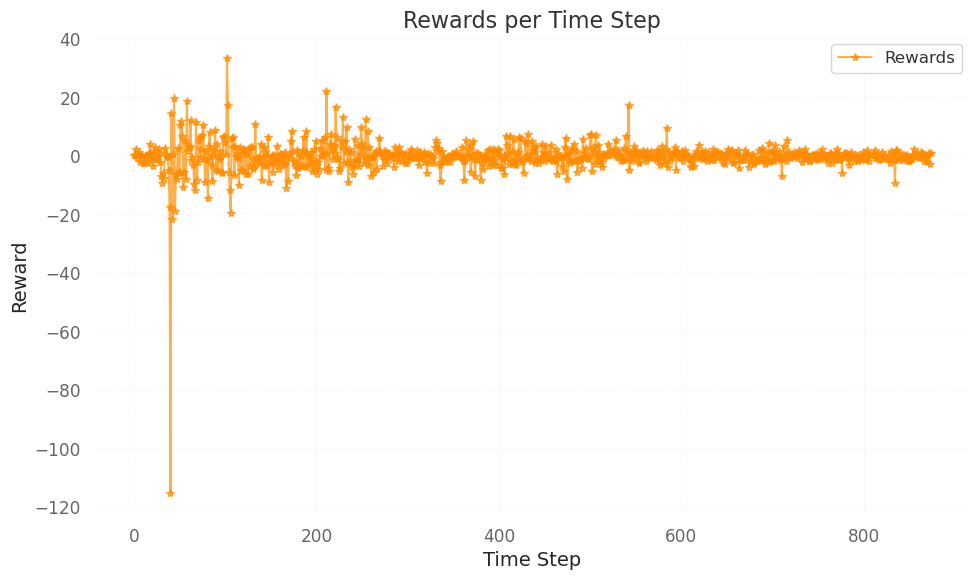

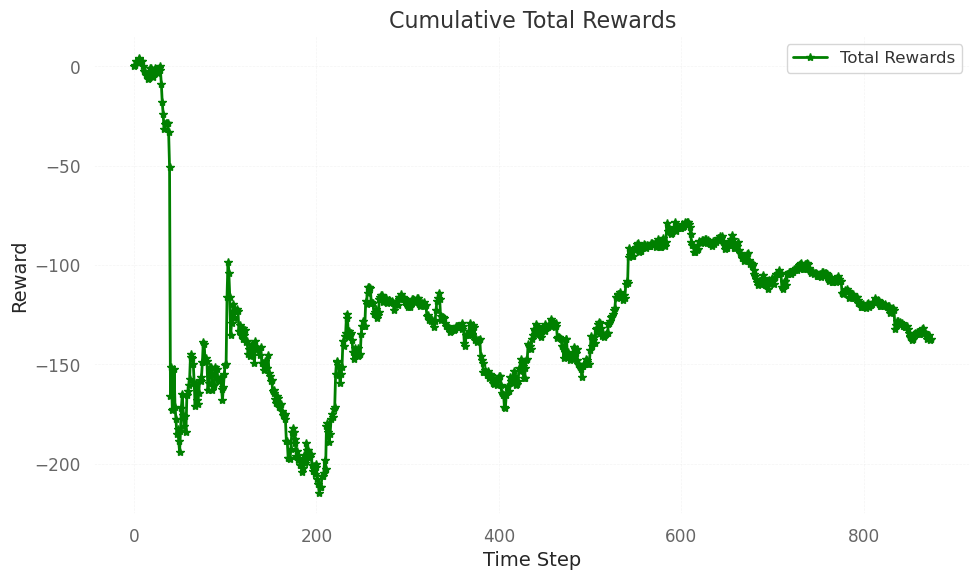

Total rewards: -137.09812884963753
Evaluating model: ('A2C', 6)
A2C Train Mean reward: -147.49 ± 0.00
A2C
Total return of portfolio: -97.01%


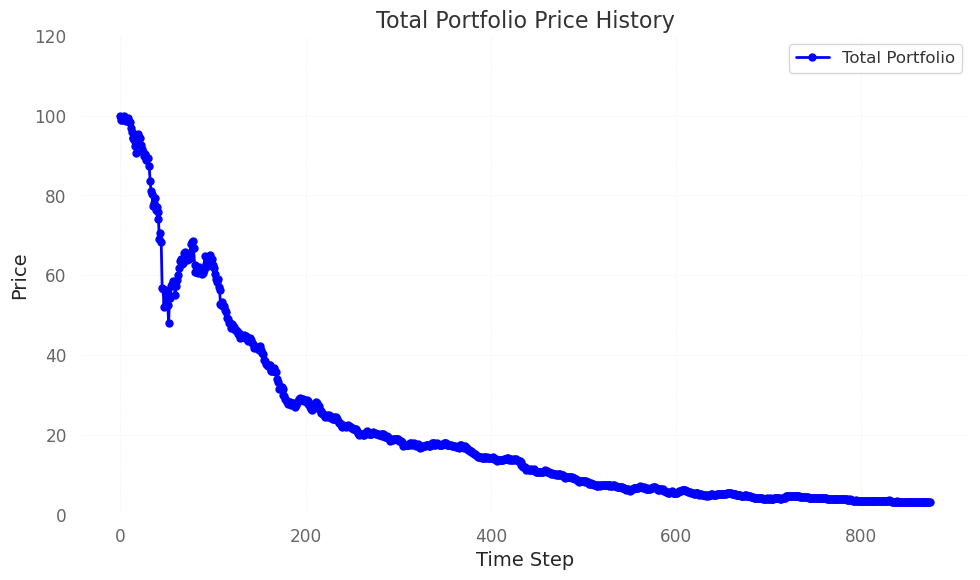

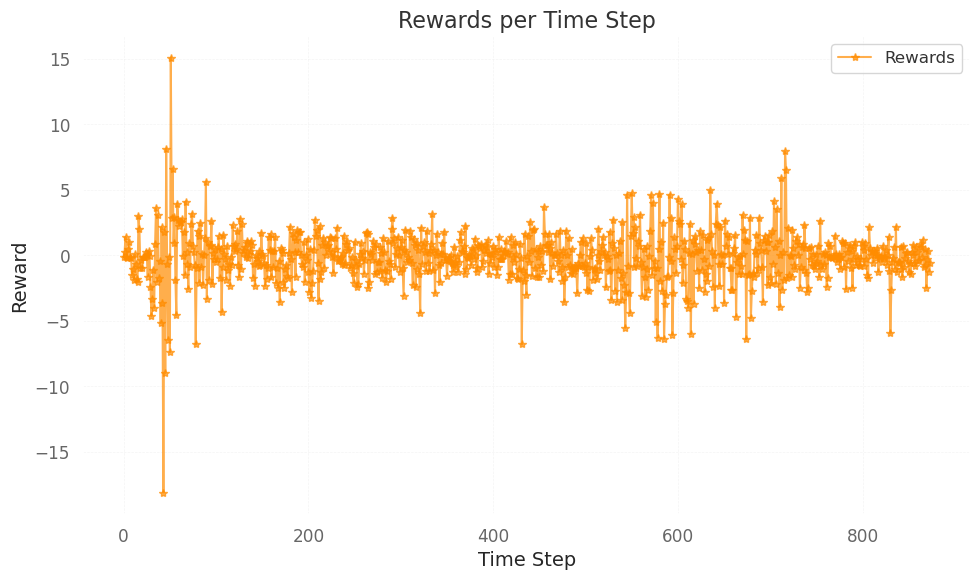

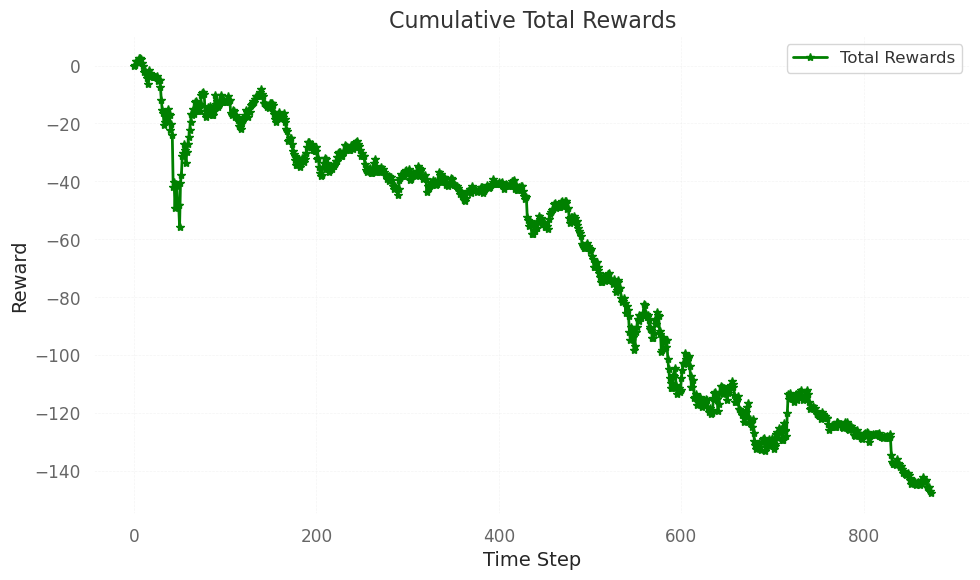

Total rewards: -147.49069043802217
Evaluating model: ('A2C', 7)
A2C Train Mean reward: -128.72 ± 0.00
A2C
Total return of portfolio: -74.45%


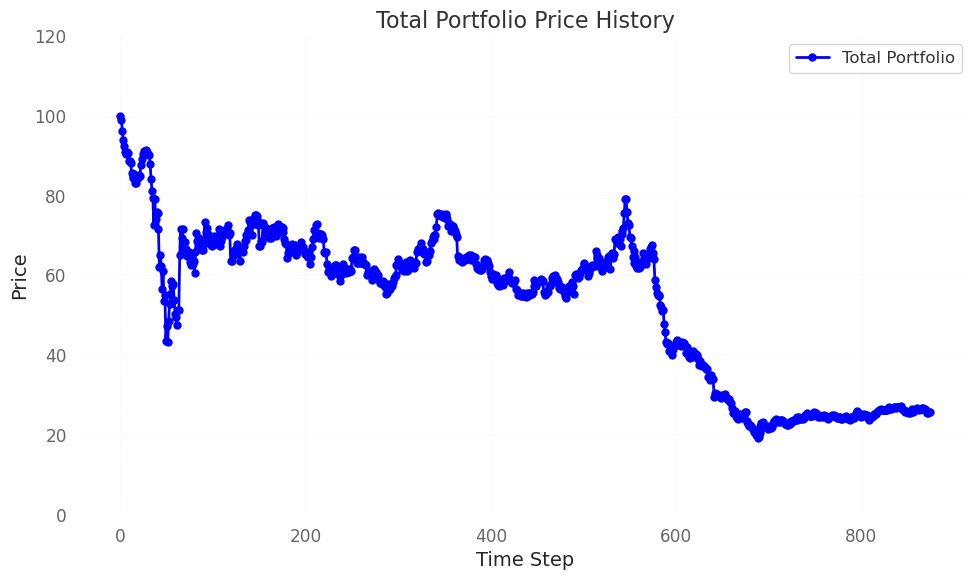

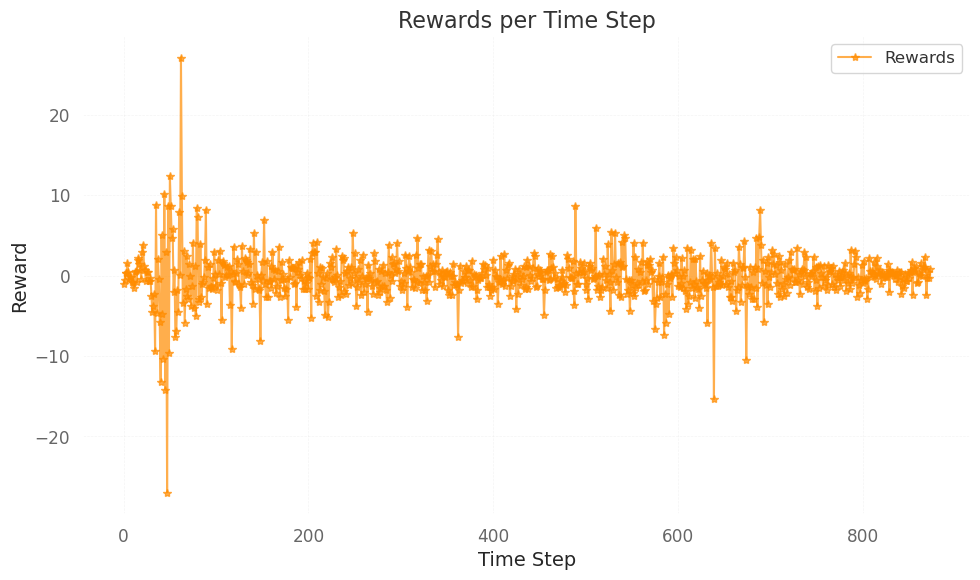

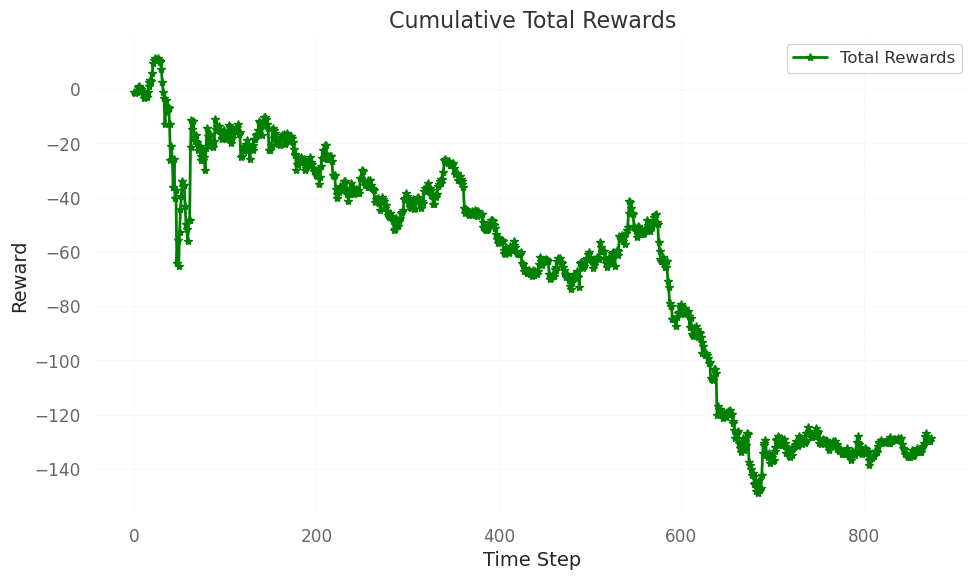

Total rewards: -128.72148111055523
Evaluating model: ('A2C', 8)
A2C Train Mean reward: -59.22 ± 0.00
A2C
Total return of portfolio: -29.16%


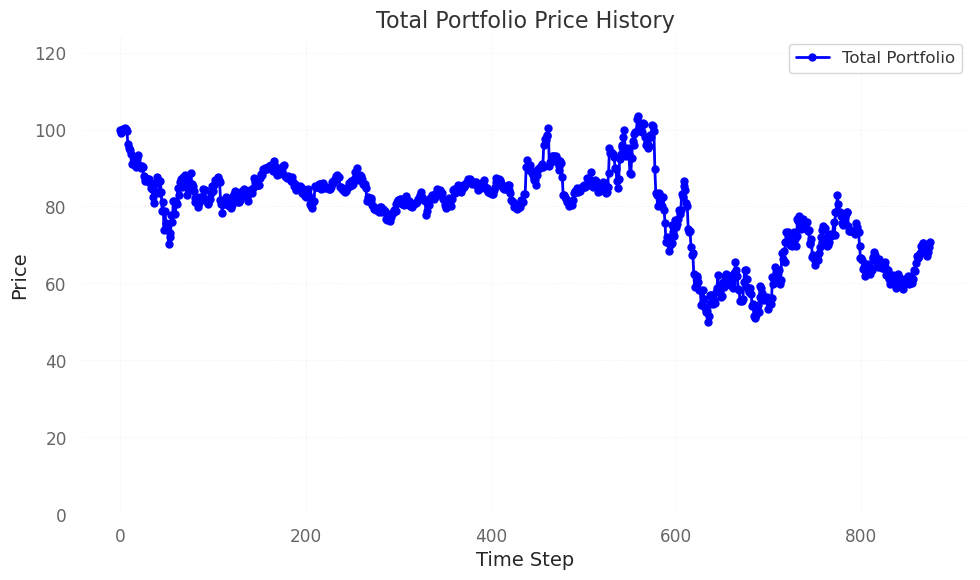

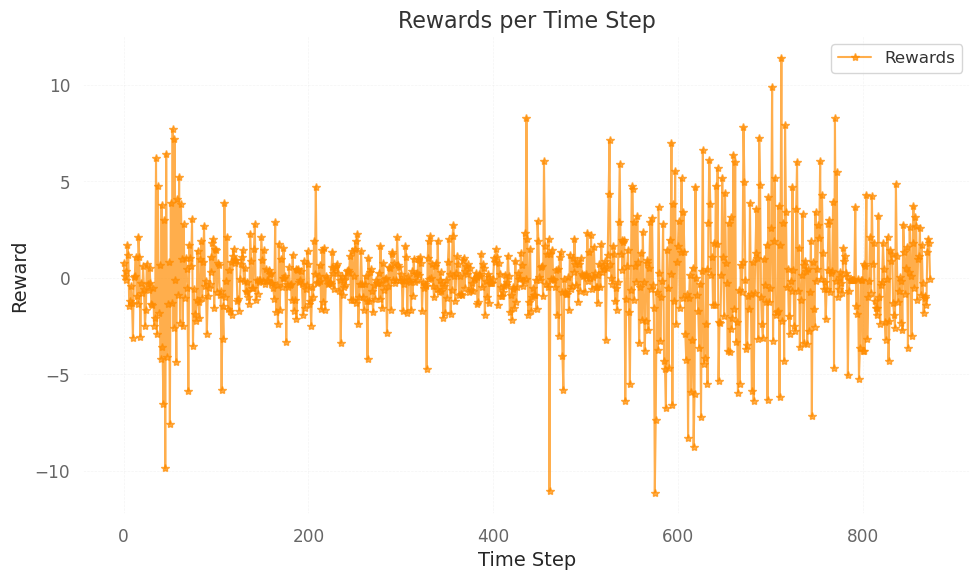

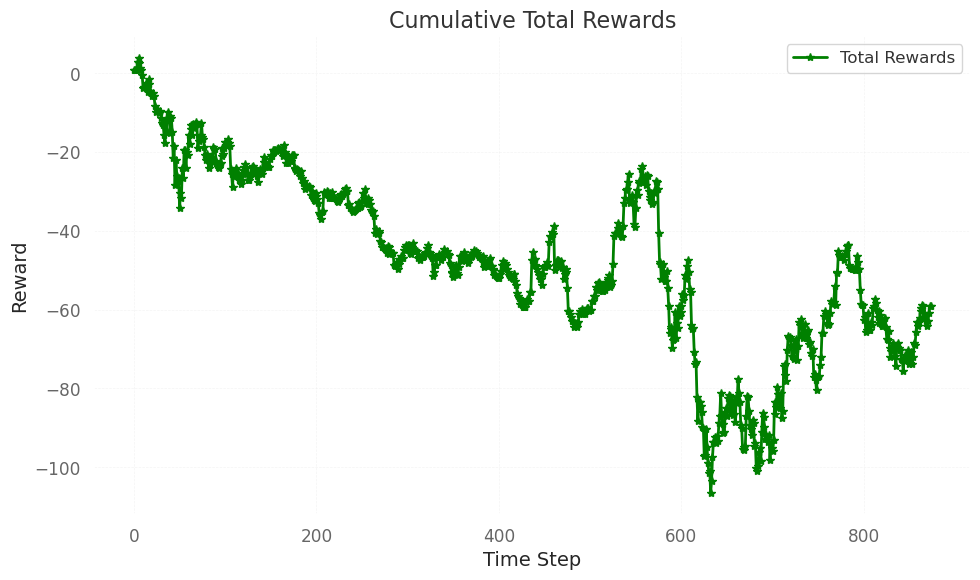

Total rewards: -59.21574561383963
Evaluating model: ('A2C', 9)
A2C Train Mean reward: -65.34 ± 0.00
A2C
Total return of portfolio: -7.28%


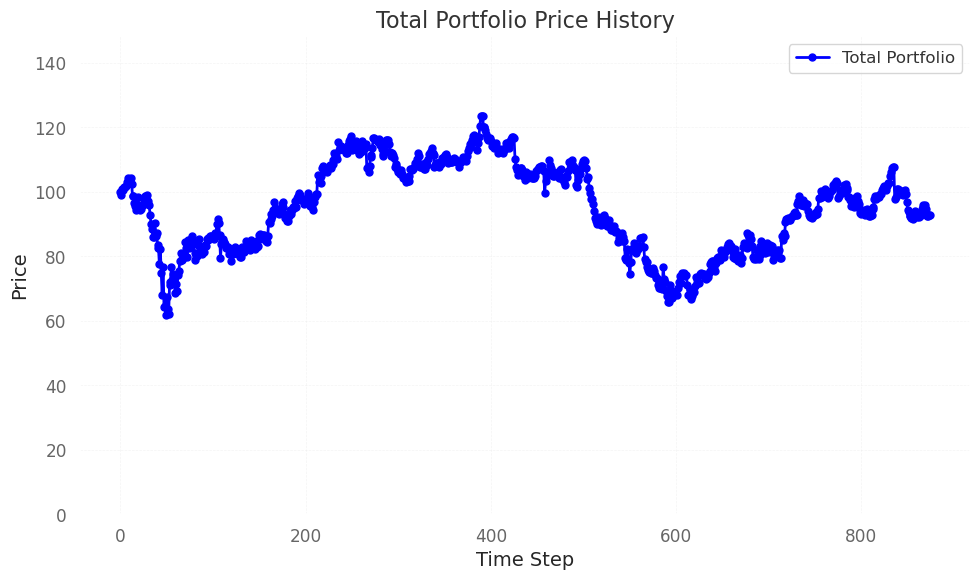

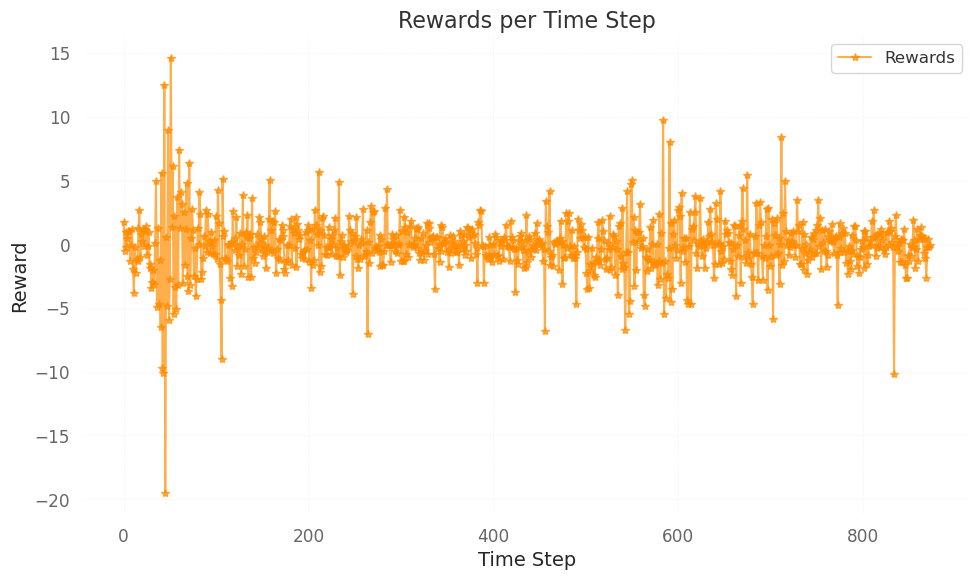

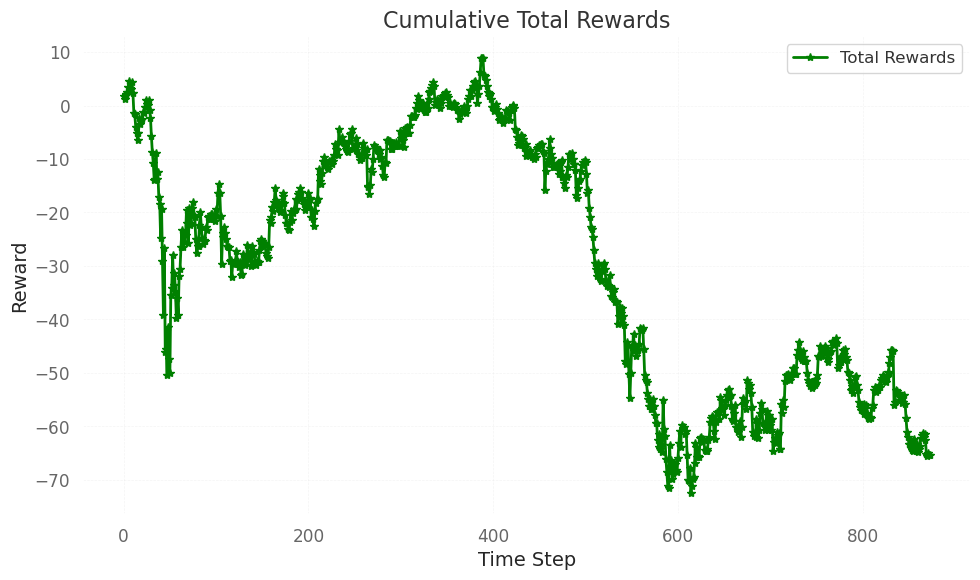

Total rewards: -65.34066276218415
Evaluating model: ('A2C', 10)
A2C Train Mean reward: -153.68 ± 0.00
A2C
Total return of portfolio: -55.21%


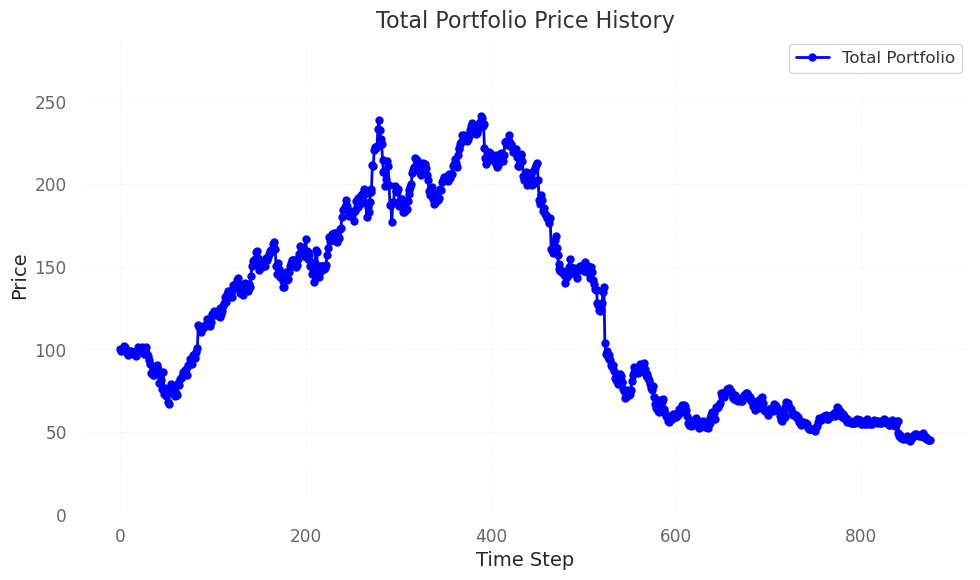

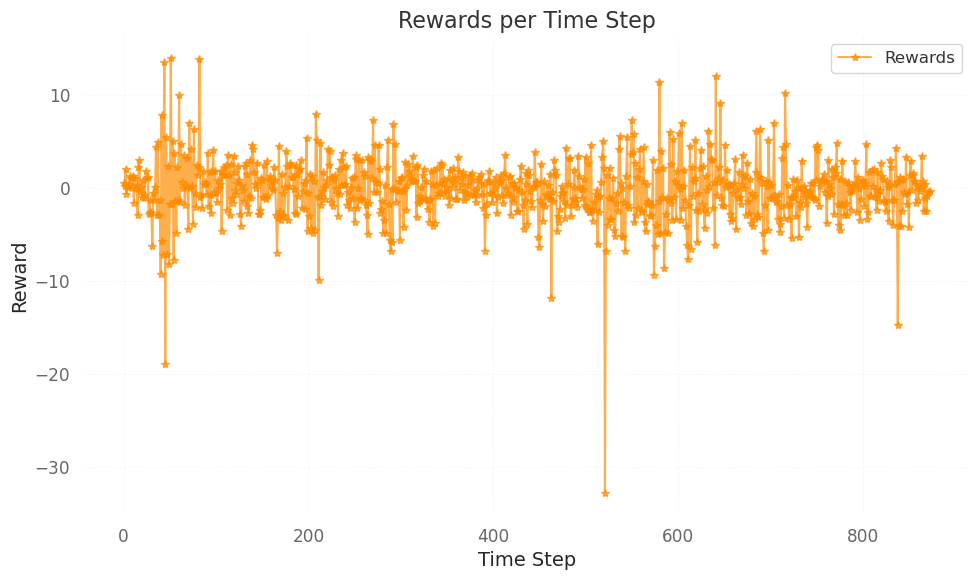

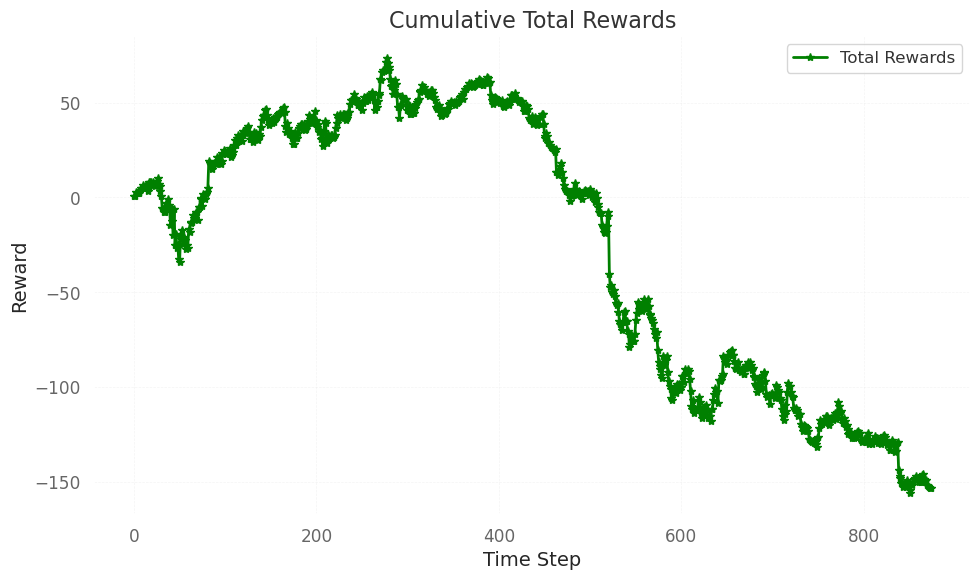

Total rewards: -153.67720830473084
Evaluating model: ('A2C', 11)
A2C Train Mean reward: -134.39 ± 0.00
A2C
Total return of portfolio: -59.92%


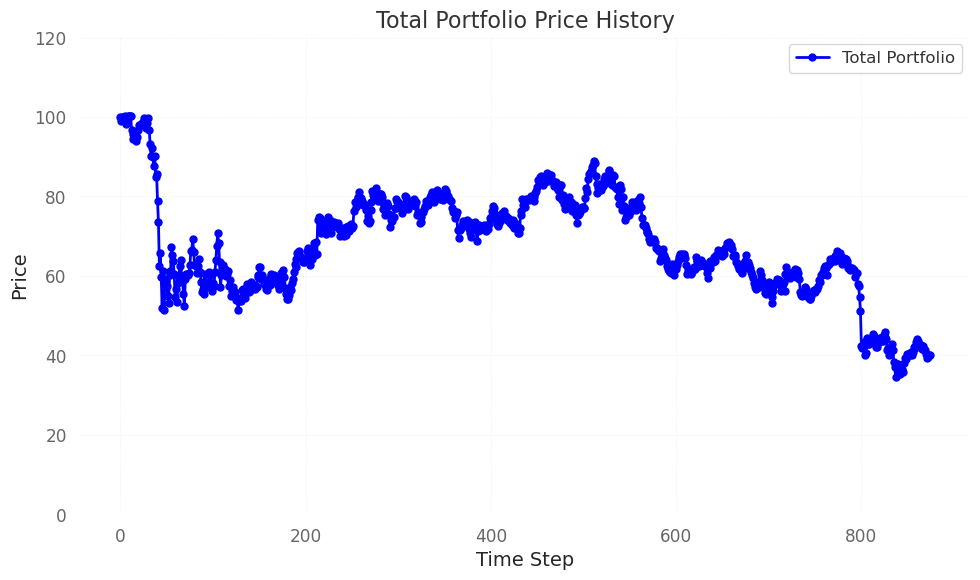

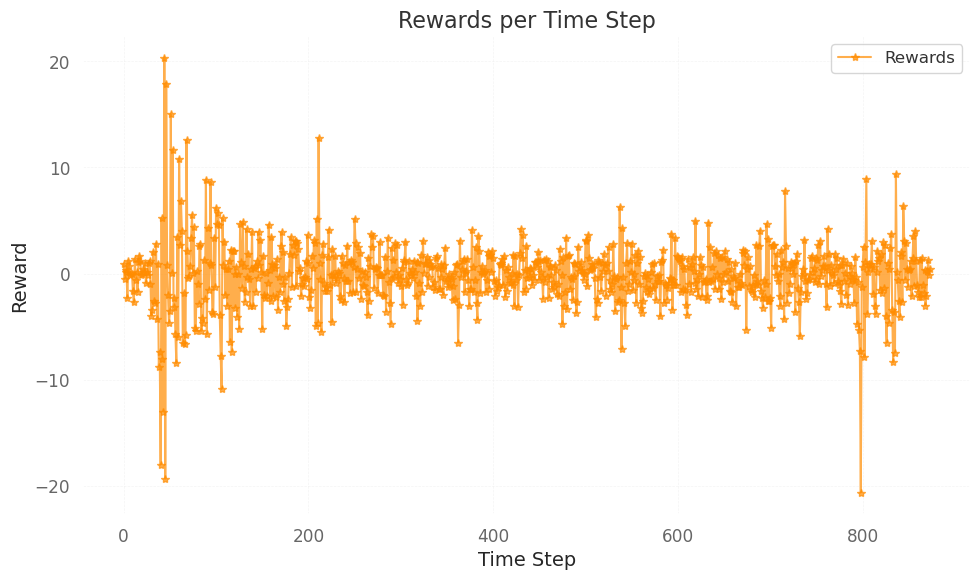

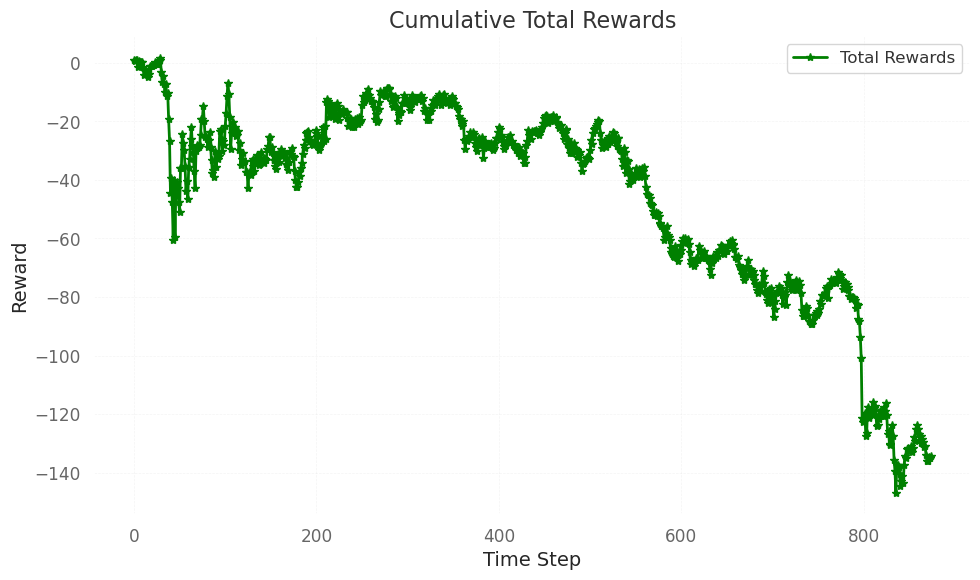

Total rewards: -134.39407755498564
Evaluating model: ('A2C', 12)
A2C Train Mean reward: -50.09 ± 0.00
A2C
Total return of portfolio: -87.25%


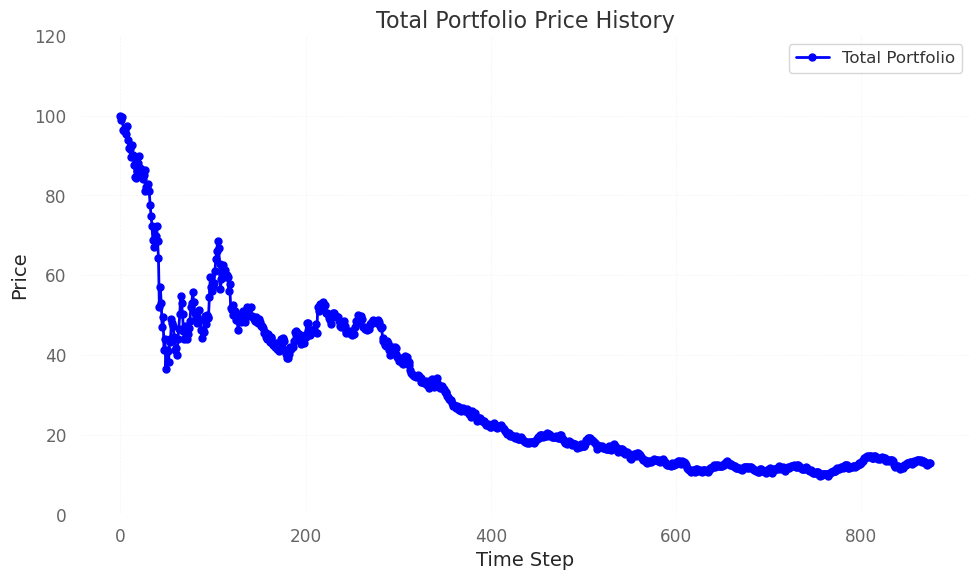

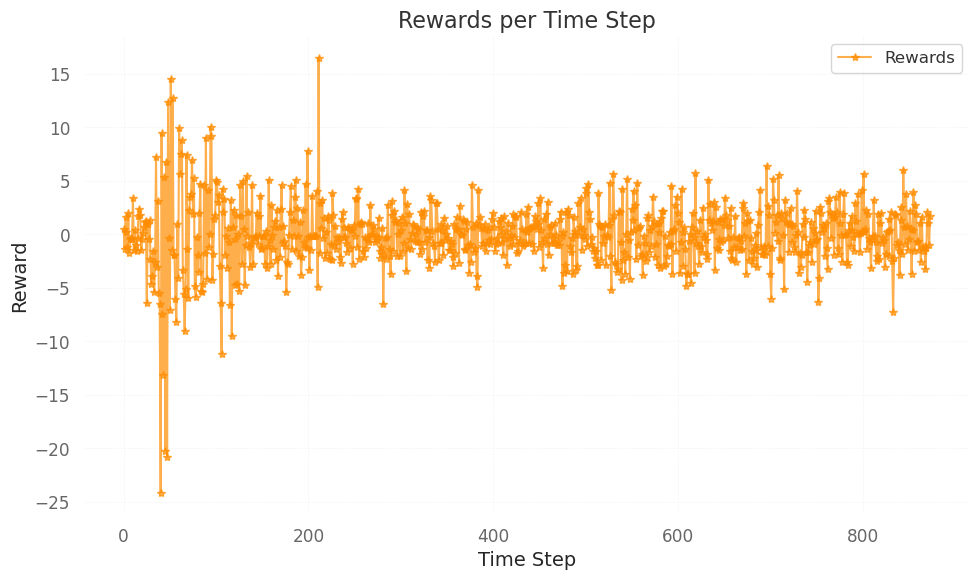

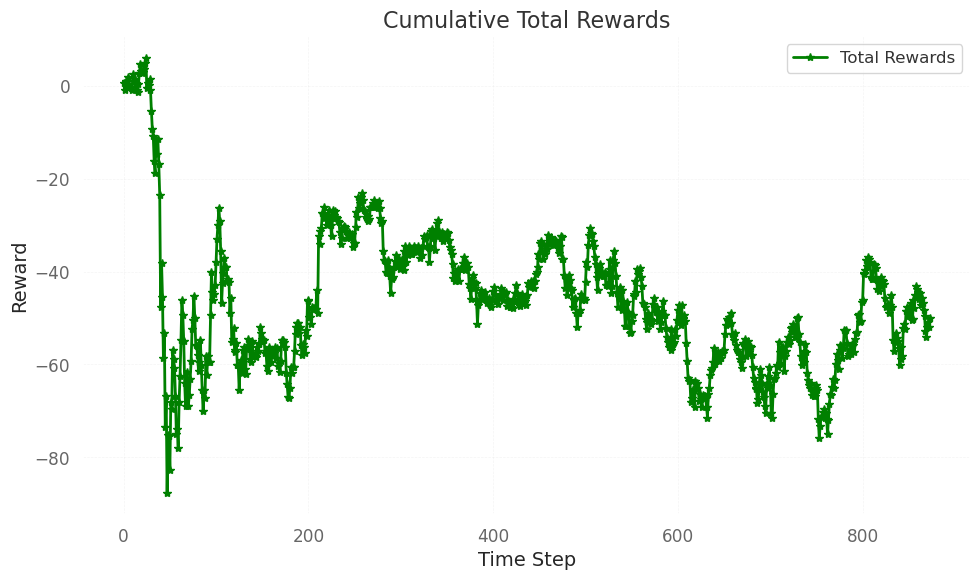

Total rewards: -50.08928620870313
Evaluating model: ('A2C', 13)
A2C Train Mean reward: -201.27 ± 0.00
A2C
Total return of portfolio: -96.26%


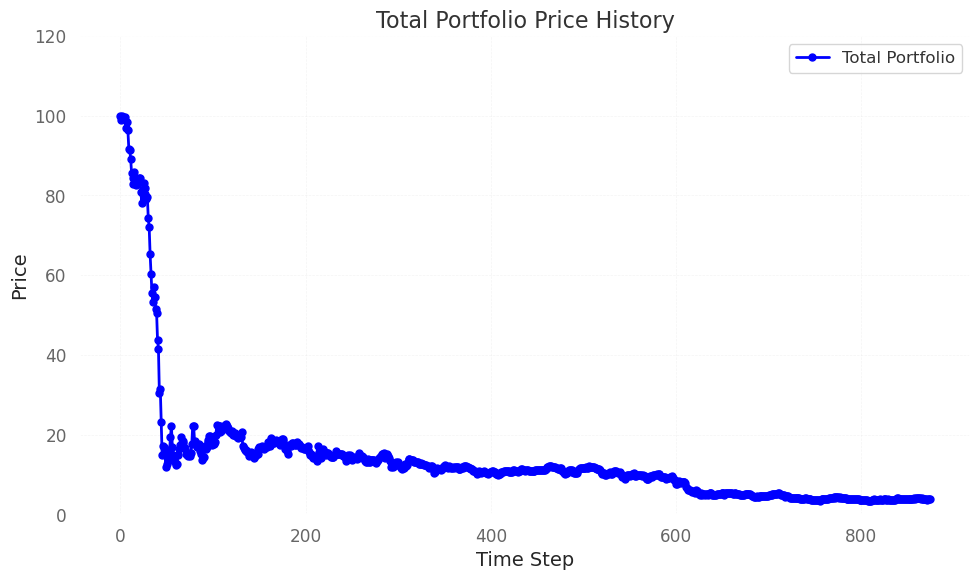

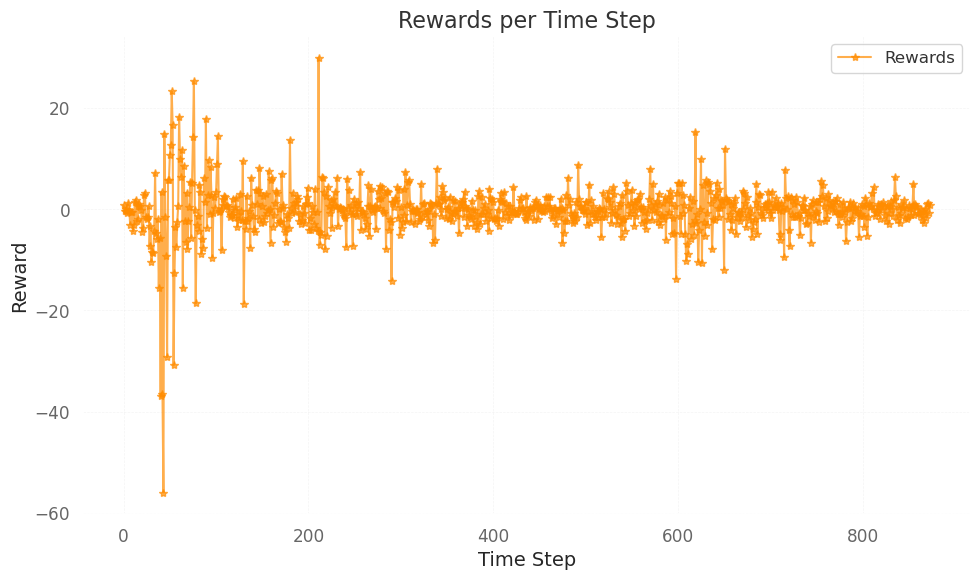

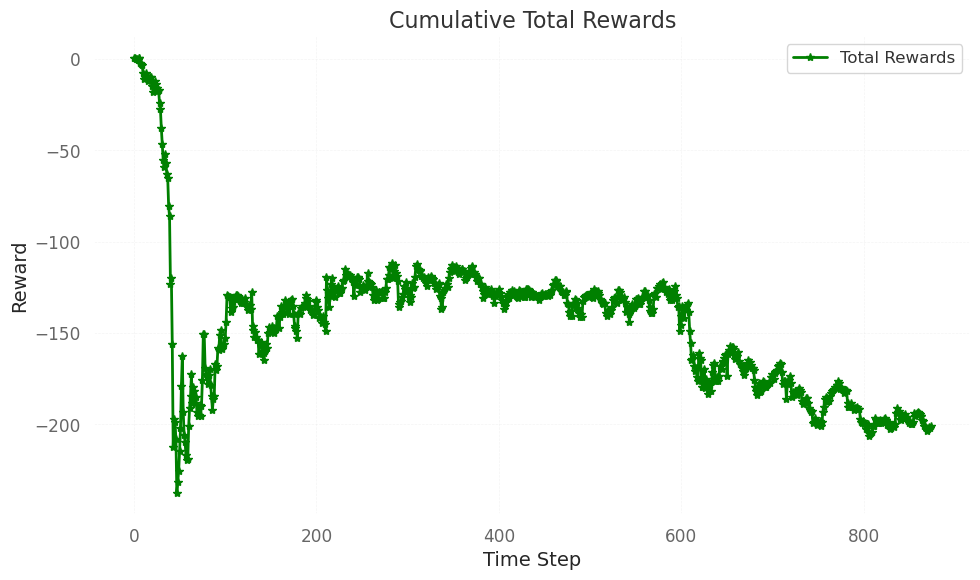

Total rewards: -201.26601192868642
Evaluating model: ('A2C', 14)
A2C Train Mean reward: -51.90 ± 0.00
A2C
Total return of portfolio: 14.81%


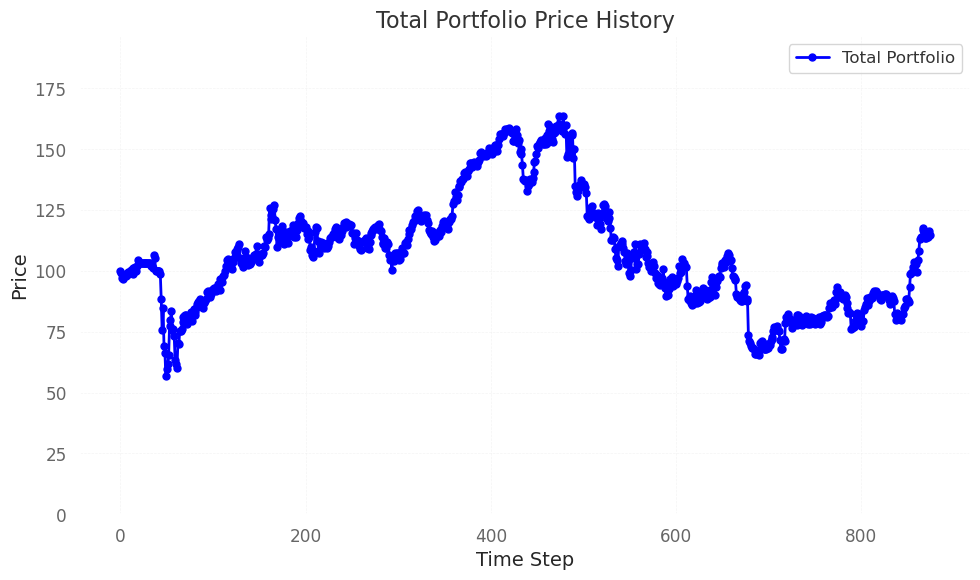

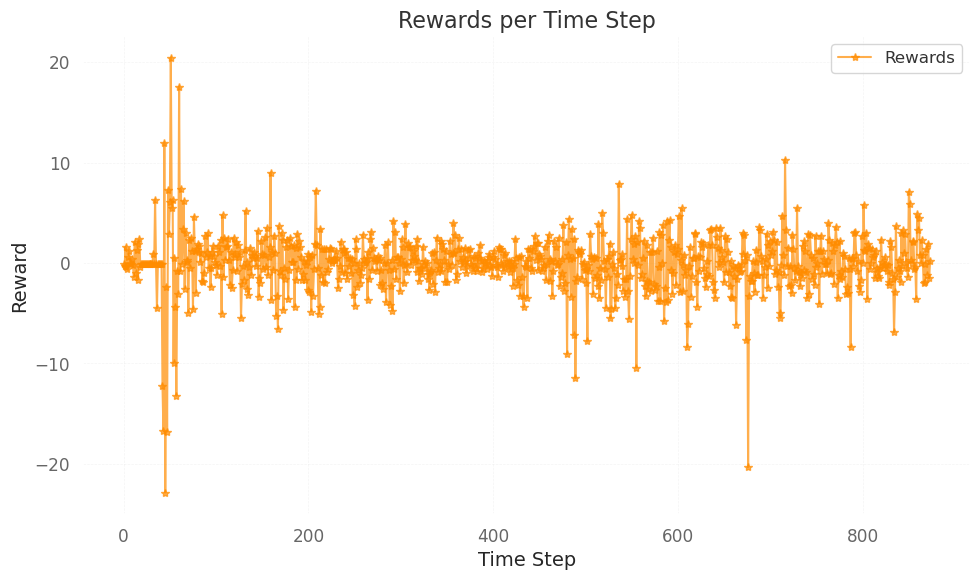

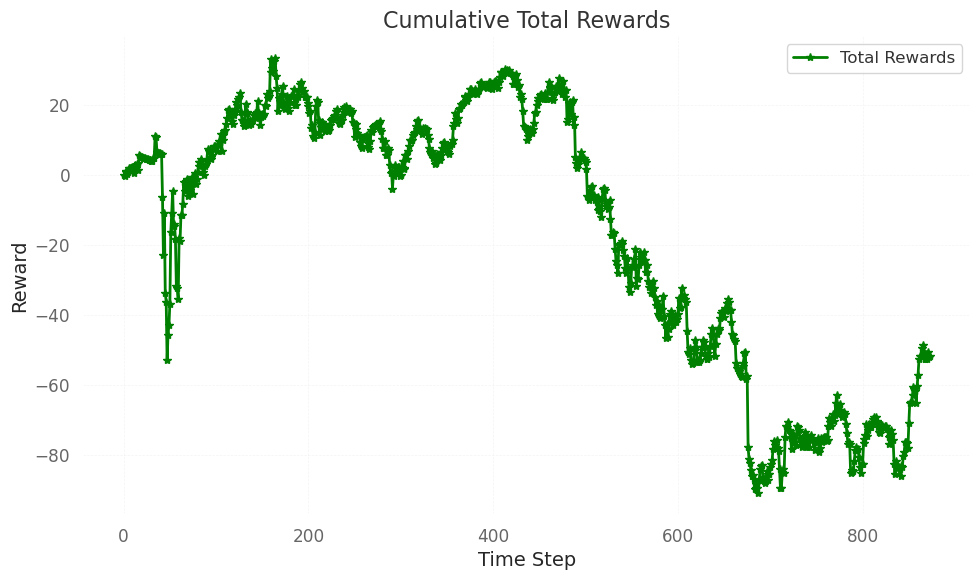

Total rewards: -51.89551280335034
Evaluating model: ('A2C', 15)
A2C Train Mean reward: 70.07 ± 0.00
A2C
Total return of portfolio: 149.97%


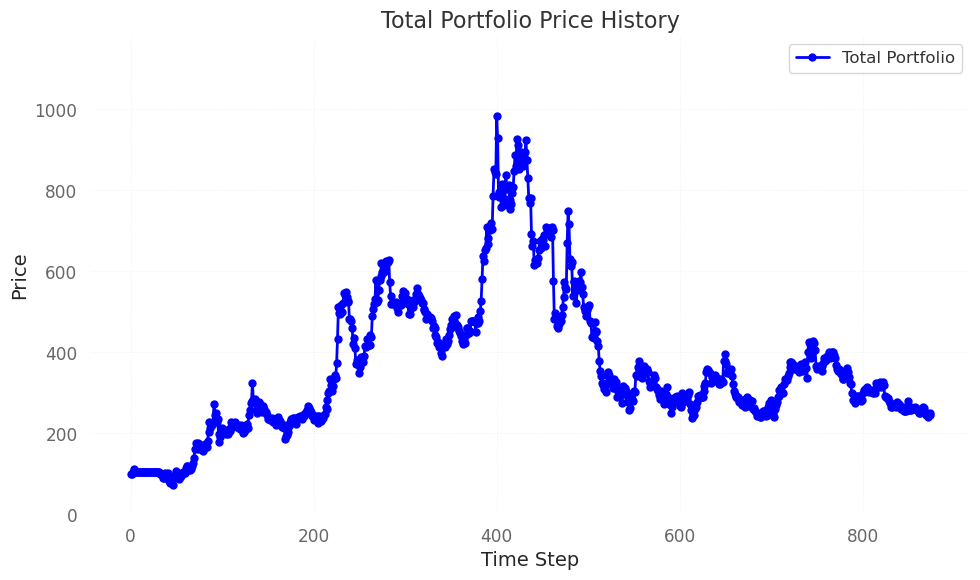

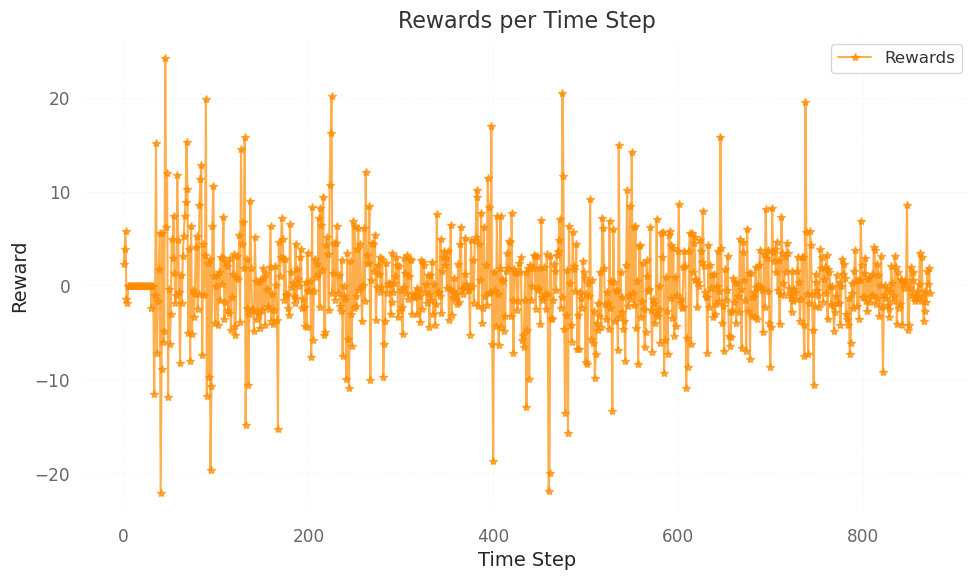

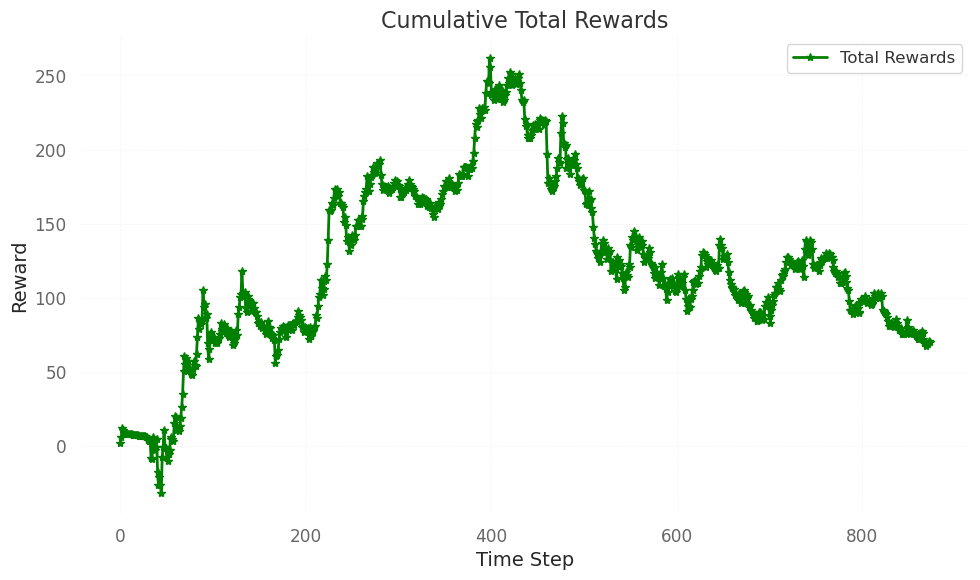

Total rewards: 70.07070558608372
Evaluating model: ('A2C', 16)
A2C Train Mean reward: -27.22 ± 0.00
A2C
Total return of portfolio: -19.90%


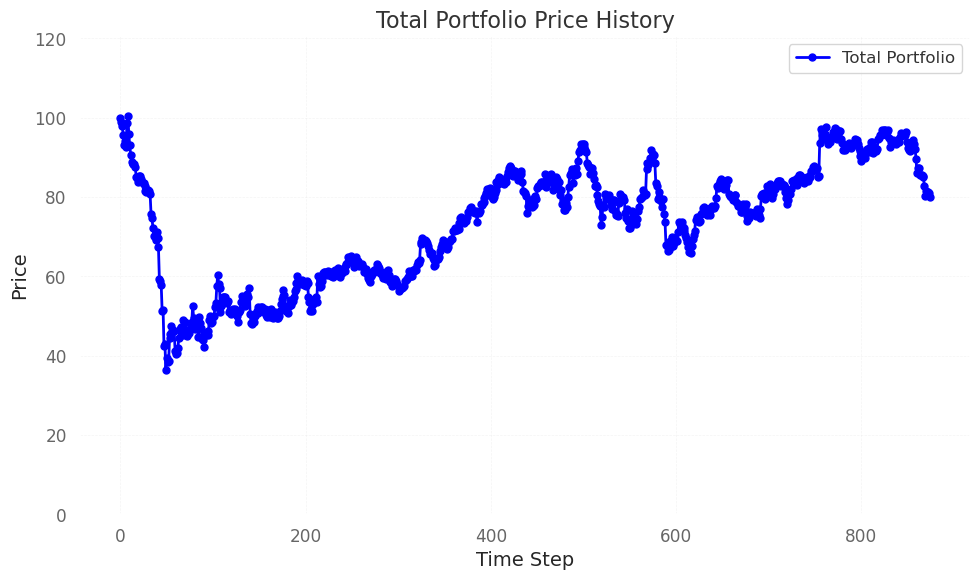

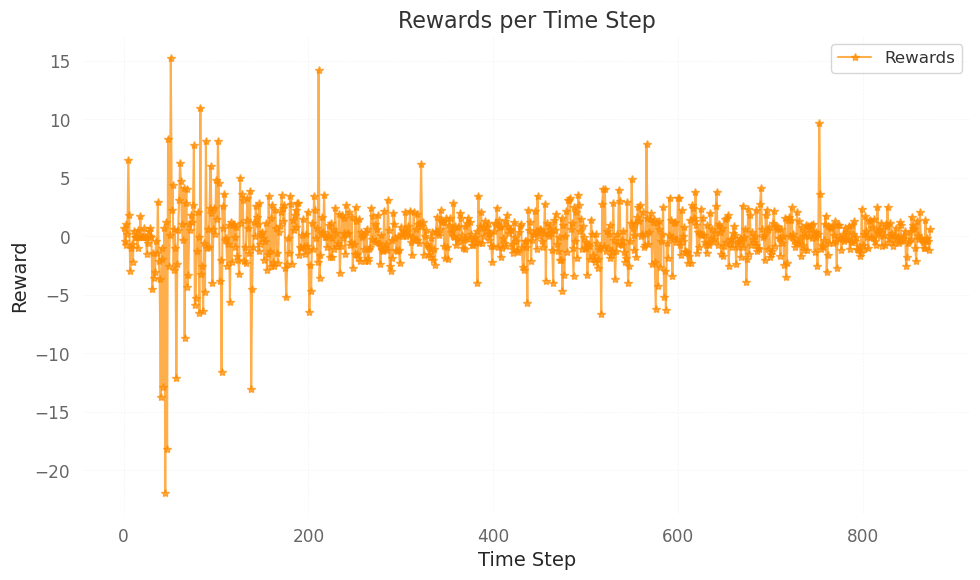

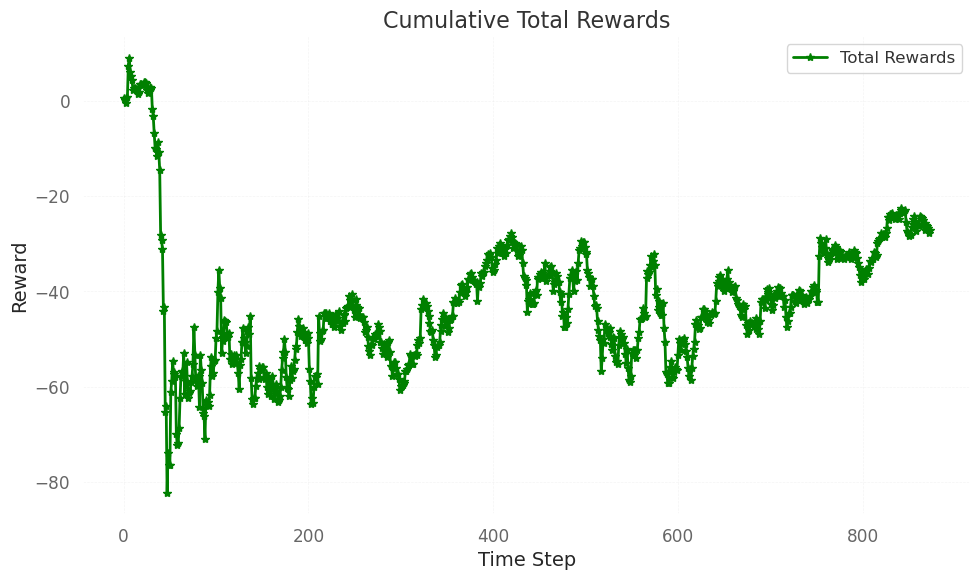

Total rewards: -27.216634869101963
Evaluating model: ('A2C', 17)
A2C Train Mean reward: -78.65 ± 0.00
A2C
Total return of portfolio: -84.64%


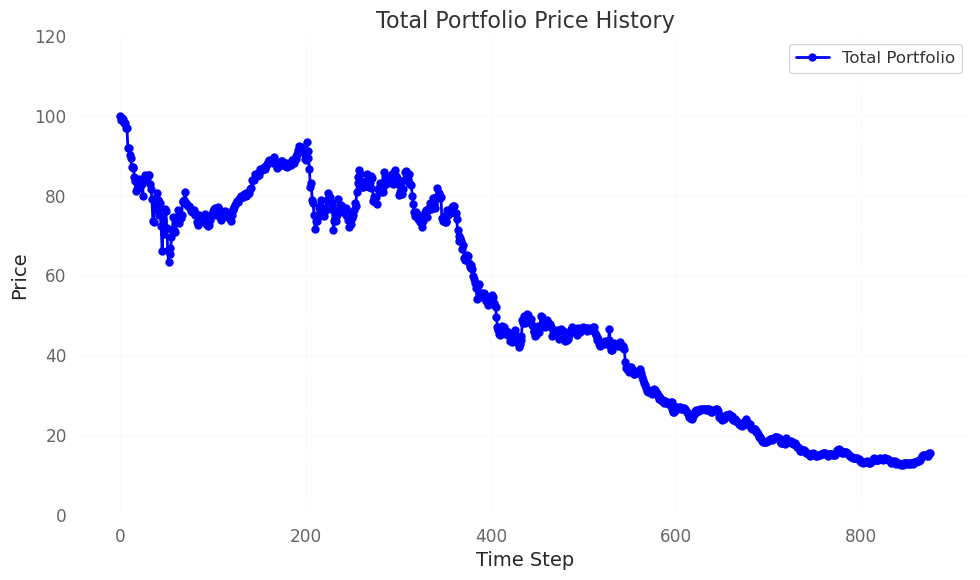

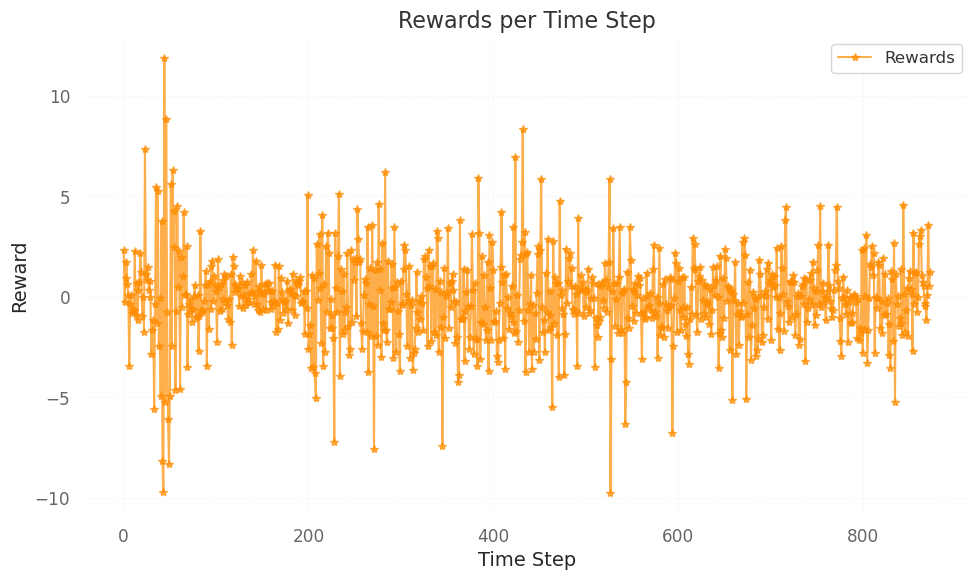

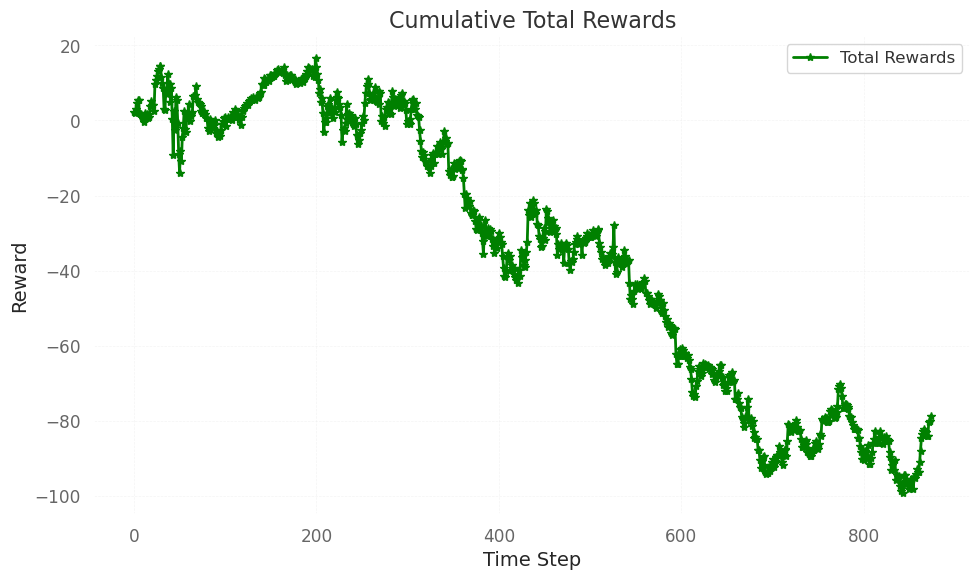

Total rewards: -78.64739047164132
A2C Valid Mean reward: -7.52 ± 0.00
A2C
Total return of portfolio: -1.59%


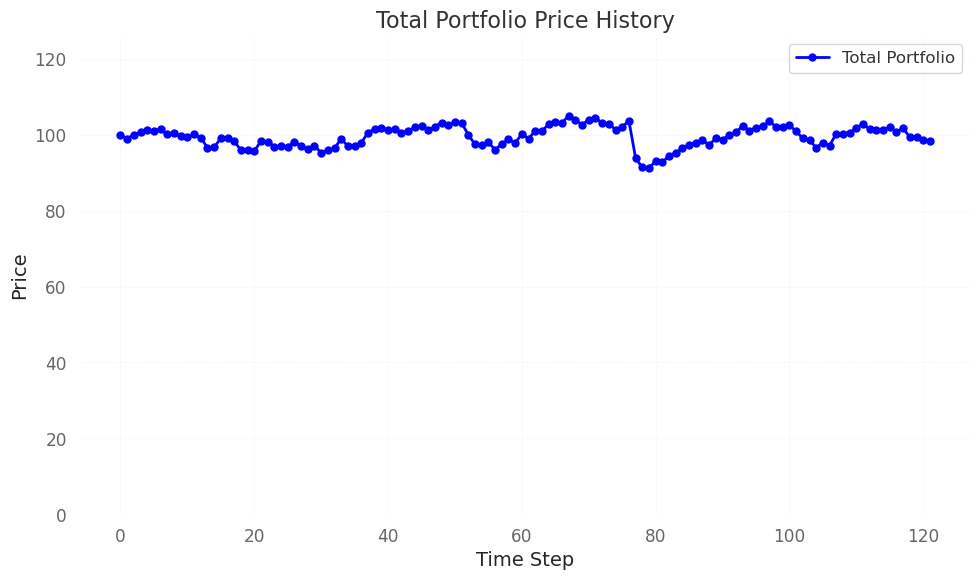

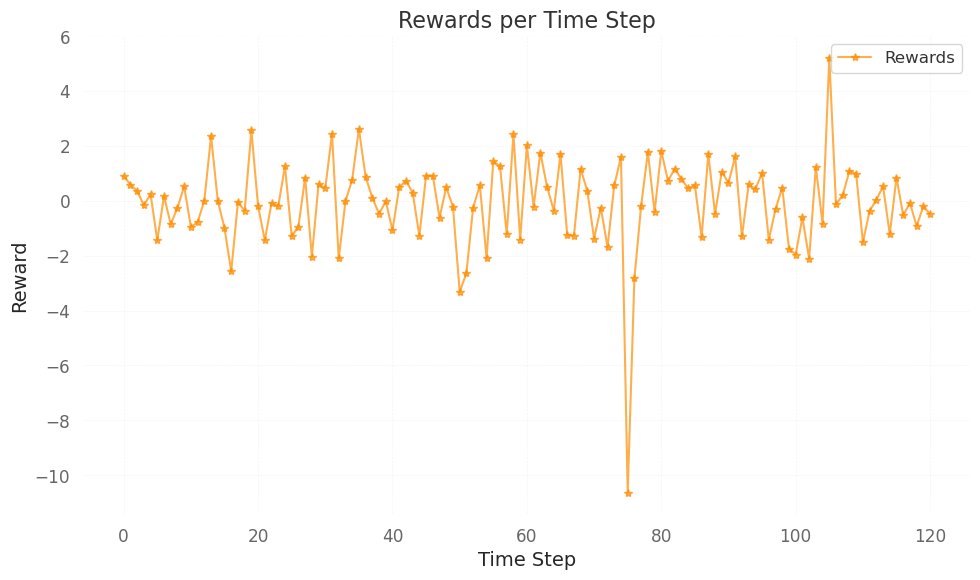

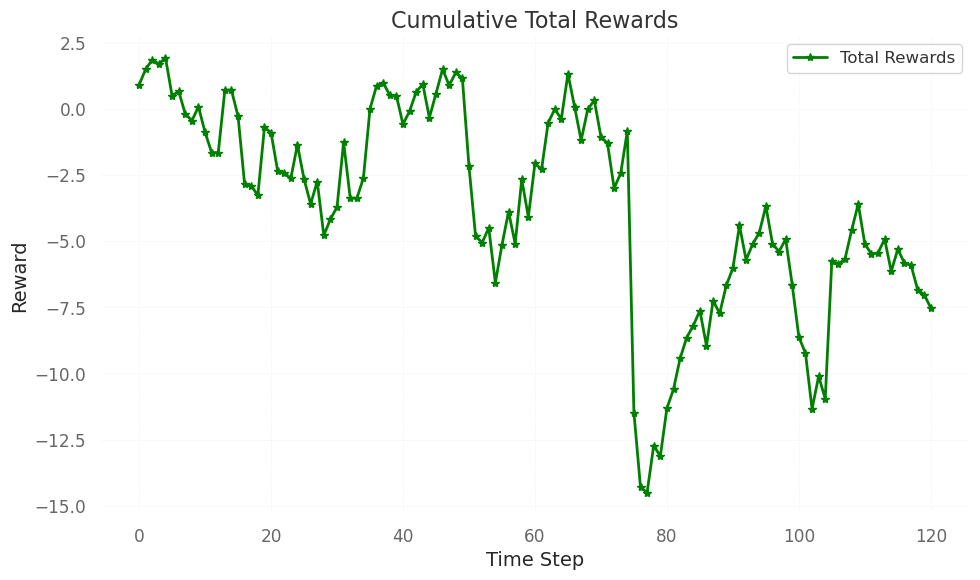

Total rewards: -7.519344330276493
A2C Test Mean reward: -3.62 ± 0.00

A2C
Total return of portfolio: 8.54%


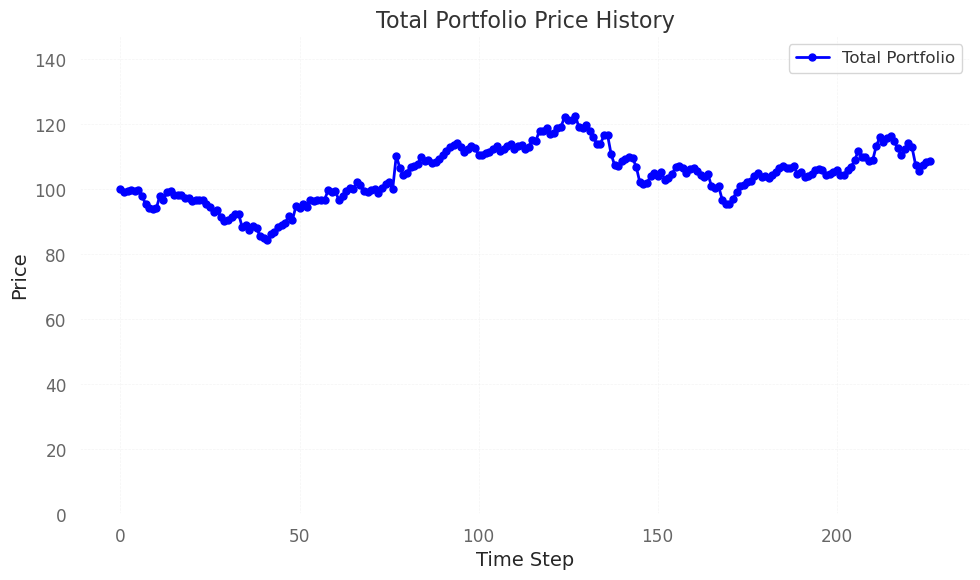

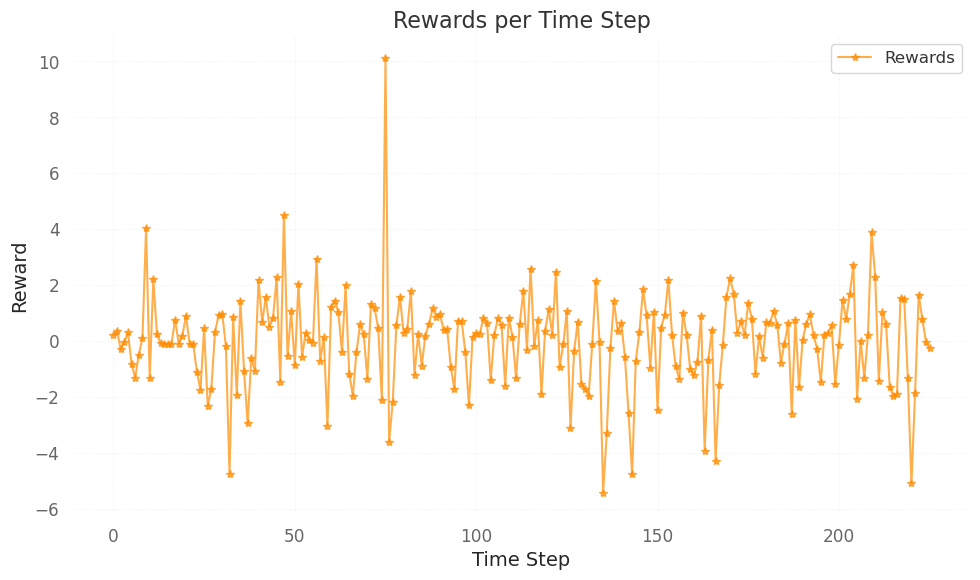

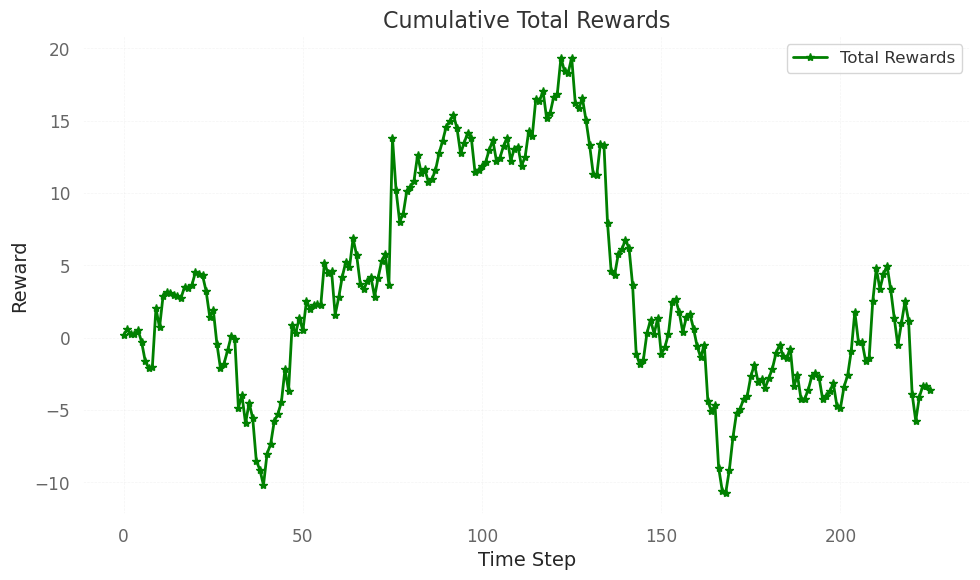

Total rewards: -3.6208508143146236


In [7]:
# Define constants
SEED = 1
history_length = 5
reward_type = 'LNR'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-06-30'
n_envs = 8
n_steps = 16
total_timesteps = 1_000
batch_size = 32
learning_rate = 0.001
ent_coef = 0.05
log_interval = 1_000
eval_freq = 1_000
model_name= 'A2C'

current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_dir = None #f'./models/model_{current_date}'
log_dir = None #f'./logs/log_{current_date}'



# Example list of 18 stock tickers
stock_list = ['NVDA', 'TSLA', 'PLTR', 'AVGO', 'F', 'INTC', 'SMCI', 'MU', 'AAPL', 'AMD', 'PFE', 'T', 'UBER', 'AMZN', 'GOOGL', 'WBD', 'BAC', 'WBA', 'GOOG', 'CVS', 'MSFT', 'CSCO', 'CMCSA', 'WFC', 'KO', 'WMT', 'VZ', 'CCL', 'XOM', 'HBAN', 'AMCR', 'HPE', 'OXY', 'SLB', 'LRCX', 'DVN', 'BA', 'NKE', 'C', 'KDP', 'KHC', 'BMY', 'NEM', 'META', 'KMI', 'PCG', 'CSX', 'AES', 'FCX', 'SCHW', 'GM', 'MRK', 'CVX', 'KEY', 'KVUE', 'MDLZ', 'SBUX', 'DIS', 'HAL', 'UNH', 'MCHP', 'NEE', 'DOW', 'JPM', 'PYPL', 'QCOM', 'EXC', 'JNJ', 'PARA', 'ORCL', 'TFC', 'APH', 'CNC', 'COP', 'ANET', 'USB', 'RF', 'MO', 'HPQ', 'CMG', 'NCLH', 'HST', 'VTRS', 'AMAT', 'WMB', 'ON', 'APA', 'V', 'ADBE', 'WDC', 'GILD', 'EQT', 'MRNA', 'DAL', 'DELL', 'PEP', 'CRM', 'CARR', 'LW', 'MS', 'ABBV', 'EW', 'GIS', 'IPG', 'LUV', 'CTRA', 'GE', 'PG', 'CCI', 'TJX', 'CNP', 'MDT']

# Split the list into groups of 6 stocks without repetition
n_groups = len(stock_list) // 6  # This should be 3 for 18/6
groups = [stock_list[i * 6:(i + 1) * 6] for i in range(n_groups)]

# Parameters for the environment
history_length = 5  # Example value
reward_type = "LNR"  # Example reward type
start_date = "2020-01-01"
end_date = "2023-06-30"
n_envs = 4  # Example number of parallel environments

# Create environments for each group of stocks
envs = []
vec_env = None

# Validation environment
valid_env, vec_valid_env = create_evaluation_env(history_length, reward_type, '2023-07-01', '2023-12-30', ['TGT', 'MARA', 'GOOGL', 'WMT', 'V', 'PG'])

# Evaluation callback for saving the best model
eval_callback = EvalCallback(
    vec_valid_env,
    n_eval_episodes=1,
    eval_freq=eval_freq,
    deterministic=True,
    verbose=0,
    best_model_save_path=model_save_dir,
)
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)

_, vec_env = create_training_env(history_length, reward_type, start_date, end_date, groups[0], n_envs)

policy_kwargs = None #dict(net_arch=dict(pi=[32, 32], vf=[32, 32]))
model = None
model = PPO('MlpPolicy', 
            vec_env, 
            learning_rate=0.002, 
            n_steps=8, 
            batch_size=16, 
            n_epochs=10, 
            gamma=0.99, 
            gae_lambda=0.95, 
            clip_range=0.2, 
            clip_range_vf=None, 
            normalize_advantage=True, 
            ent_coef=0.10, vf_coef=0.5, 
            max_grad_norm=0.5, 
            use_sde=False, 
            sde_sample_freq=-1, 
            rollout_buffer_class=None, 
            rollout_buffer_kwargs=None, 
            target_kl=None, 
            stats_window_size=100, 
            tensorboard_log = log_dir, 
            policy_kwargs=policy_kwargs, 
            verbose=0, 
            seed=0, 
            device='auto', 
            _init_setup_model=True)

model = A2C('MlpPolicy', 
                    vec_env,
                    learning_rate=0.002,
                    n_steps=8,
                    gamma=0.99,
                    gae_lambda=1.0,
                    ent_coef=0.05,
                    vf_coef=0.5,
                    max_grad_norm=0.5,
                    rms_prop_eps=1e-05,
                    use_rms_prop=True,
                    use_sde=False,
                    sde_sample_freq=-1,
                    rollout_buffer_class=None,
                    rollout_buffer_kwargs=None,
                    normalize_advantage=False,
                    stats_window_size=100,
                    tensorboard_log=log_dir,
                    policy_kwargs=None,
                    verbose=0,
                    seed=0,
                    device='auto',
                    _init_setup_model=True)

for stocks in groups:
    env, vec_env = create_training_env(history_length, reward_type, start_date, end_date, stocks, n_envs)
    envs.append(env)
    model.set_env(vec_env)
    model.learn(
            total_timesteps=total_timesteps,
            progress_bar=False,
            log_interval=log_interval,
            tb_log_name=f"A2C",
            reset_num_timesteps=False,
            callback=eval_callback
        )

# Test environment
test_env, _ = create_evaluation_env(history_length, reward_type, '2024-01-01', '2024-12-01', ['TGT', 'MARA', 'GOOGL', 'WMT', 'V', 'PG'], n_envs=1)
     
for i in range(len(envs)):    
    # Evaluate the model on training and test environments
    print(f"Evaluating model: {model_name,i}")

    # Training evaluation
    mean_train_reward, std_train_reward = evaluate_policy(
        model.policy if hasattr(model, 'policy') else model,
        envs[i],
        n_eval_episodes=1,
        deterministic=True
    )
    print(f"{model_name} Train Mean reward: {mean_train_reward:.2f} ± {std_train_reward:.2f}")
    evaluate_model(envs[i], model, model_name, 1, has_policy=True) if hasattr(model, 'policy') else evaluate_model(envs[i], model, model_name, 1, has_policy=False)
    envs[i].close()

# Valid evaluation
mean_valid_reward, std_valid_reward = evaluate_policy(
    model.policy if hasattr(model, 'policy') else model,
    valid_env,
    n_eval_episodes=1,
    deterministic=True
)
print(f"{model_name} Valid Mean reward: {mean_valid_reward:.2f} ± {std_valid_reward:.2f}")
evaluate_model(valid_env, model, model_name, 1, has_policy=True) if hasattr(model, 'policy') else evaluate_model(valid_env, model, model_name, 1, has_policy=False)

# Test evaluation
mean_test_reward, std_test_reward = evaluate_policy(
    model.policy if hasattr(model, 'policy') else model,
    test_env,
    n_eval_episodes=1,
    deterministic=True
)
print(f"{model_name} Test Mean reward: {mean_test_reward:.2f} ± {std_test_reward:.2f}\n")
evaluate_model(test_env, model, model_name, 1, has_policy=True) if hasattr(model, 'policy') else evaluate_model(test_env, model, model_name, 1, has_policy=False)

# Close environments
valid_env.close()
test_env.close()
vec_valid_env.close()
vec_env.close()
del model